## **Import libraries**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime

## **Import data**

In [129]:
# Specify the quiniela you want to import (i.e., nacional, buenos_aires, misiones, etc.)
quiniela_name = 'nacional'
raw_df = pd.read_csv('./data_source/quiniela_{}.csv'.format(quiniela_name))

df_quiniela = raw_df.copy()
df_quiniela.head()

lottery_date  quiniela   period  position  result
0   2014-11-01  nacional  primera         1    3940
1   2014-11-01  nacional  primera         2    6857
2   2014-11-01  nacional  primera         3     609
3   2014-11-01  nacional  primera         4    8018
4   2014-11-01  nacional  primera         5    3232

## **Data exploration and cleaning**

In [130]:
# Check data types, null and total values.
df_quiniela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191060 entries, 0 to 191059
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   lottery_date  191060 non-null  object
 1   quiniela      191060 non-null  object
 2   period        191060 non-null  object
 3   position      191060 non-null  int64 
 4   result        191060 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.3+ MB


### Fix data types
*Note: 'position' is categorical ordinal data, but to the effects of creating position groups -see betting options-, it will be treated as numerical data (no change in format at this point).*

In [131]:
# Modify 'lottery_date' to type DATE.
df_quiniela['lottery_date'] = pd.to_datetime(df_quiniela['lottery_date'])
# Parse 'result' as TEXT with 4 characters an leading zeros. This feature is, in essence, categorical nominal data.
df_quiniela['result'] = df_quiniela['result'].astype(str).str.zfill(4)

df_quiniela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191060 entries, 0 to 191059
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   lottery_date  191060 non-null  datetime64[ns]
 1   quiniela      191060 non-null  object        
 2   period        191060 non-null  object        
 3   position      191060 non-null  int64         
 4   result        191060 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.3+ MB


In [132]:
# Check leading zeros for 'result'
df_quiniela.head()

lottery_date  quiniela   period  position result
0   2014-11-01  nacional  primera         1   3940
1   2014-11-01  nacional  primera         2   6857
2   2014-11-01  nacional  primera         3   0609
3   2014-11-01  nacional  primera         4   8018
4   2014-11-01  nacional  primera         5   3232

## **Feature engineering & more EDA**

### Add new columns, splitting results by betting options
This features will allow us to analyze occurrences by types of bets availables
(1 digit, 2 digits, 3 digits, 4 digits - https://www.laquinieladetucuman.com.ar/quiniela-nacional/cuanto-paga-premios)
> To analyze results individually and grouped by number of digits, the new columns will be formatted as numbers

In [133]:
# Four digits
df_quiniela['digits_4'] = df_quiniela['result'].astype(int)
# Three digits
df_quiniela['digits_3'] = df_quiniela['result'].str[-3:].astype(int)
# Two digits
df_quiniela['digits_2'] = df_quiniela['result'].str[-2:].astype(int)

# First digit column
df_quiniela['first_digit'] = df_quiniela['result'].str[-4].astype(int)
# Second digit column
df_quiniela['second_digit'] = df_quiniela['result'].str[-3].astype(int)
# Third digit column
df_quiniela['third_digit'] = df_quiniela['result'].str[-2].astype(int)
# Fourth & One digit column
df_quiniela['fourth_digit'] = df_quiniela['result'].str[-1].astype(int)

df_quiniela.head()

lottery_date  quiniela   period  position result  digits_4  digits_3  \
0   2014-11-01  nacional  primera         1   3940      3940       940   
1   2014-11-01  nacional  primera         2   6857      6857       857   
2   2014-11-01  nacional  primera         3   0609       609       609   
3   2014-11-01  nacional  primera         4   8018      8018        18   
4   2014-11-01  nacional  primera         5   3232      3232       232   

   digits_2  first_digit  second_digit  third_digit  fourth_digit  
0        40            3             9            4             0  
1        57            6             8            5             7  
2         9            0             6            0             9  
3        18            8             0            1             8  
4        32            3             2            3             2

In [134]:
# Check main statistics to validate data
df_quiniela.describe()

position       digits_4       digits_3       digits_2  \
count  191060.000000  191060.000000  191060.000000  191060.000000   
mean       10.500000    5008.019366     498.713388      49.463415   
std         5.766296    2886.793826     288.682076      28.864417   
min         1.000000       0.000000       0.000000       0.000000   
25%         5.750000    2507.000000     248.000000      24.000000   
50%        10.500000    5019.000000     497.000000      49.000000   
75%        15.250000    7504.000000     748.000000      74.000000   
max        20.000000    9999.000000     999.000000      99.000000   

         first_digit   second_digit    third_digit   fourth_digit  
count  191060.000000  191060.000000  191060.000000  191060.000000  
mean        4.509306       4.492500       4.495959       4.503821  
std         2.872757       2.872592       2.872816       2.873970  
min         0.000000       0.000000       0.000000       0.000000  
25%         2.000000       2.000000       2.000000       2.000000  
50%         5.000000       4.000000       4.000000       5.000000  
75%         7.000000       7.000000       7.000000       7.000000  
max         9.000000       9.000000       9.000000       9.000000

> *No outliers identified. Data seems valid, considering ranges for each number of digits, their mean and percentiles. Median being different between digits is also reasonable, being 4 and 5, since ranges go from 0 to 9.*

### Add position group
This feature will allow us to analyze occurrences by betting options in position groups
(a 1, a los 5, a los 10, a los 15, a los 20 - https://www.laquinieladetucuman.com.ar/quiniela-nacional/cuanto-paga-premios)

In [135]:
# Function to classify positions in groups
def classify_positions(position_number):

    if position_number == 1: return 'a_1'
    elif position_number <= 5: return 'a_los_5'
    elif position_number <= 10: return 'a_los_10'
    elif position_number <= 15: return 'a_los_15'
    elif position_number <= 20: return 'a_los_20'

In [136]:
# Create new column and apply classification of position groups to each occurrence
df_quiniela['position_group'] = df_quiniela['position'].apply(lambda x: classify_positions(x))

# Check classification results
df_quiniela.head(21)

lottery_date  quiniela   period  position result  digits_4  digits_3  \
0    2014-11-01  nacional  primera         1   3940      3940       940   
1    2014-11-01  nacional  primera         2   6857      6857       857   
2    2014-11-01  nacional  primera         3   0609       609       609   
3    2014-11-01  nacional  primera         4   8018      8018        18   
4    2014-11-01  nacional  primera         5   3232      3232       232   
5    2014-11-01  nacional  primera         6   9538      9538       538   
6    2014-11-01  nacional  primera         7   4258      4258       258   
7    2014-11-01  nacional  primera         8   3722      3722       722   
8    2014-11-01  nacional  primera         9   2182      2182       182   
9    2014-11-01  nacional  primera        10   6112      6112       112   
10   2014-11-01  nacional  primera        11   9275      9275       275   
11   2014-11-01  nacional  primera        12   7158      7158       158   
12   2014-11-01  nacional  primera        13   8147      8147       147   
13   2014-11-01  nacional  primera        14   2643      2643       643   
14   2014-11-01  nacional  primera        15   4704      4704       704   
15   2014-11-01  nacional  primera        16   8479      8479       479   
16   2014-11-01  nacional  primera        17   3964      3964       964   
17   2014-11-01  nacional  primera        18   1519      1519       519   
18   2014-11-01  nacional  primera        19   3391      3391       391   
19   2014-11-01  nacional  primera        20   0496       496       496   
20   2014-11-03  nacional  primera         1   2601      2601       601   

    digits_2  first_digit  second_digit  third_digit  fourth_digit  \
0         40            3             9            4             0   
1         57            6             8            5             7   
2          9            0             6            0             9   
3         18            8             0            1             8   
4         32            3             2            3             2   
5         38            9             5            3             8   
6         58            4             2            5             8   
7         22            3             7            2             2   
8         82            2             1            8             2   
9         12            6             1            1             2   
10        75            9             2            7             5   
11        58            7             1            5             8   
12        47            8             1            4             7   
13        43            2             6            4             3   
14         4            4             7            0             4   
15        79            8             4            7             9   
16        64            3             9            6             4   
17        19            1             5            1             9   
18        91            3             3            9             1   
19        96            0             4            9             6   
20         1            2             6            0             1   

   position_group  
0             a_1  
1         a_los_5  
2         a_los_5  
3         a_los_5  
4         a_los_5  
5        a_los_10  
6        a_los_10  
7        a_los_10  
8        a_los_10  
9        a_los_10  
10       a_los_15  
11       a_los_15  
12       a_los_15  
13       a_los_15  
14       a_los_15  
15       a_los_20  
16       a_los_20  
17       a_los_20  
18       a_los_20  
19       a_los_20  
20            a_1

### Check distributions and statistics

In [171]:
# Check how many values we have for each of the periods and position groups
pd.pivot_table(
    df_quiniela,
    index=['period'],
    columns='position_group',
    values='result',
    aggfunc=np.count_nonzero,
    margins=True,
    margins_name='Total'
)

position_group   a_1  a_los_10  a_los_15  a_los_20  a_los_5   Total
period                                                             
matutina        2384     11920     11920     11920     9536   47680
nocturna        2398     11990     11990     11990     9592   47960
primera         2409     12045     12045     12045     9636   48180
vespertina      2362     11810     11810     11810     9448   47240
Total           9553     47765     47765     47765    38212  191060

> *This 'size' information will be useful when deciding what the target variable will be, which model to use, and how to apply with the data we have.*

In [138]:
# Create function to display distributions based on period, digit options for results, and position group (optional)
def display_distribution(period_in, number_in, position_in=''):

    plt.figure(figsize=(15,3))
    # Determine the title text to be displayed, depending on what -if any- position group is passed as an argument
    position_string = ('positon ' + position_in) if position_in != '' else 'no particular position'
    # Define the title of the chart, based on the selections, to make it descriptive of what you are looking at
    plt.title('Results distribution by number of digits in {} {}, for {} and {}'.format(quiniela_name, period_in, number_in, position_string), fontsize=20)

    # Create a temporary dataframe, filtering by the period and position group passed as an argument to the function
    df_temp = df_quiniela[
        (df_quiniela['period'] == period_in) 
        & (df_quiniela['position_group'] == position_in if position_in != '' else df_quiniela['position'] <= 20)
        ].sort_values(by=number_in)

    # Change the number of bins based on number of digits: 100 if it is more than 1, 10 if it is one digit
    bin_number = 100 if 'digits' in number_in else 10

    # Create the histogram for the selected number
    sns.histplot(df_temp[number_in], bins=bin_number)
    # plt.hist(df_temp[number_in], bins=bin_number)

    return plt.show()

Addressing the following questions:

>- *What is the distribution of the results by individual digits, regardless of the position, for each of the periods?*<br>
>&emsp;Distributions for a specific digit, at any position, are considered uniform. Maximum variance between peaks is 3%.<br>
>
>- *What are the modes for the digits in each period?*<br>
>&emsp;See [individual modes](#individual_modes).<br>

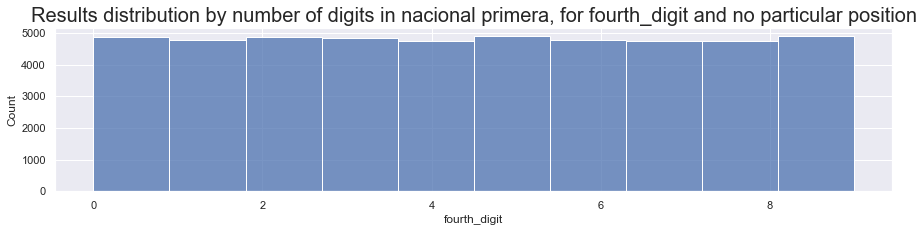

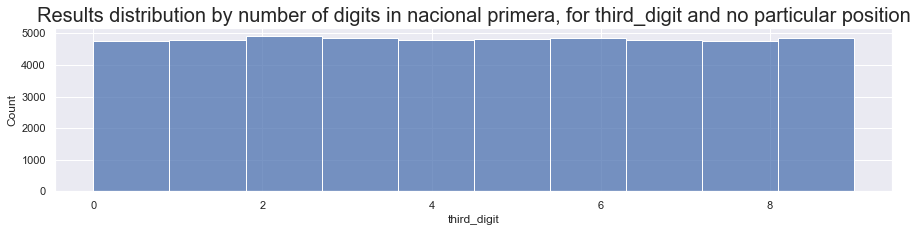

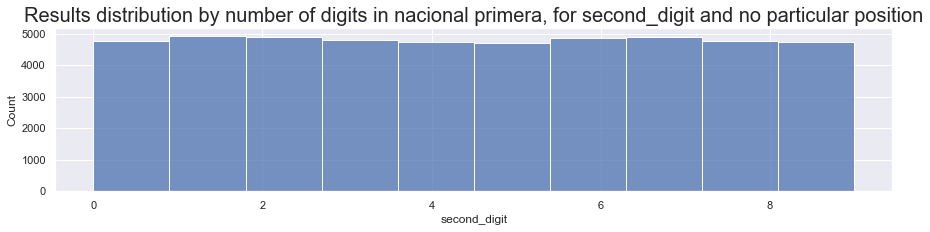

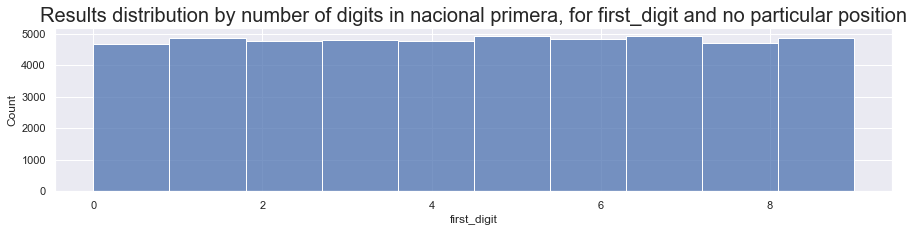

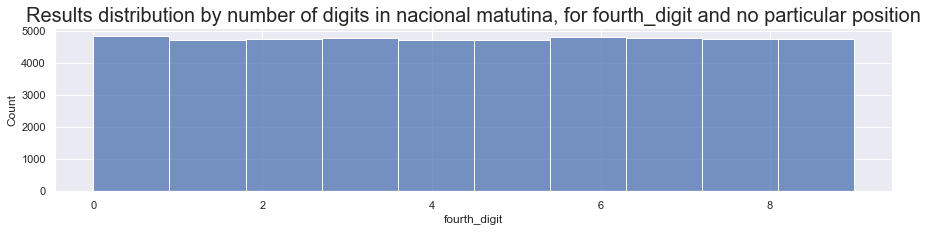

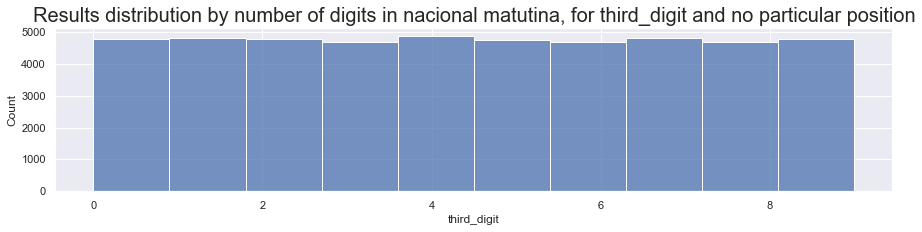

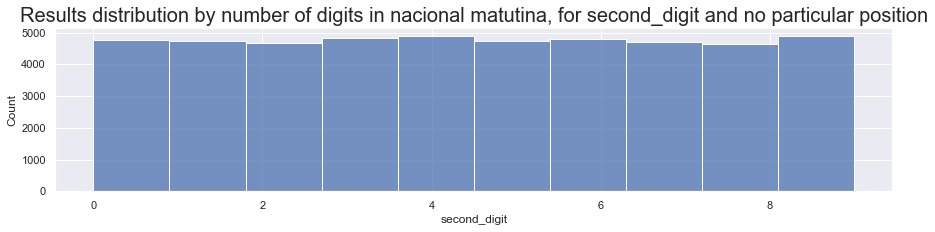

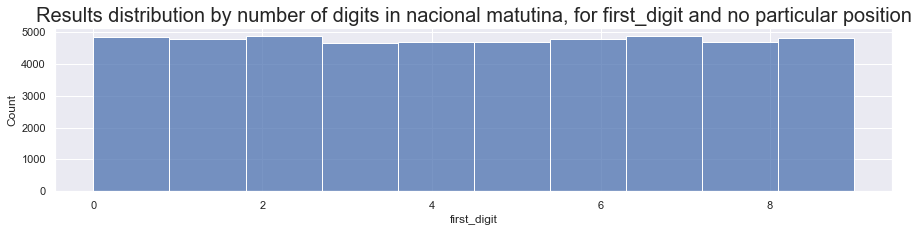

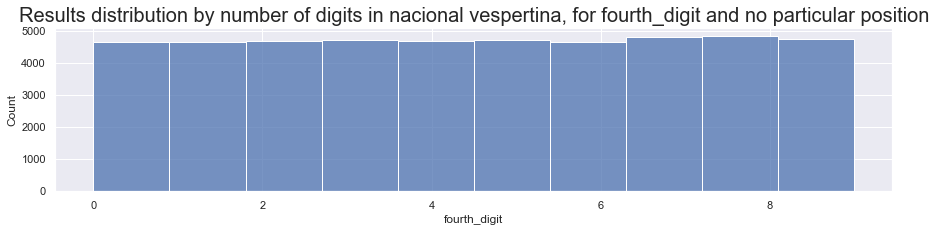

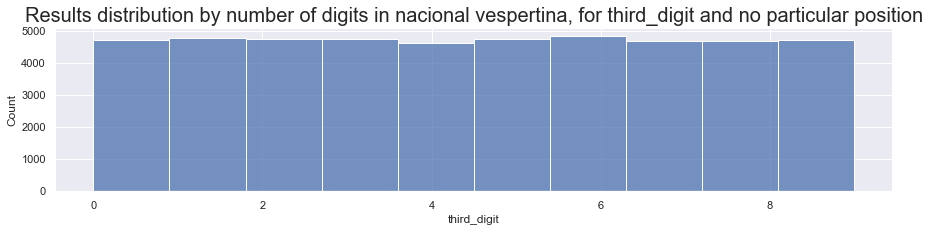

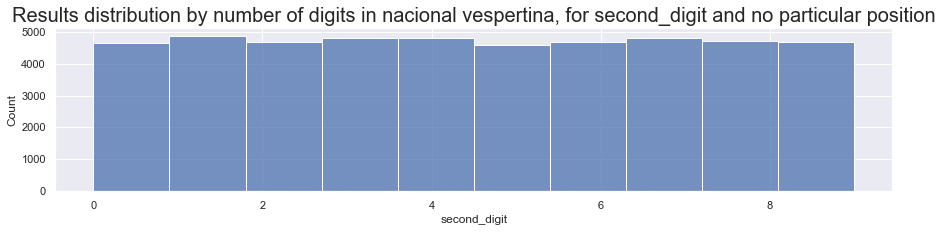

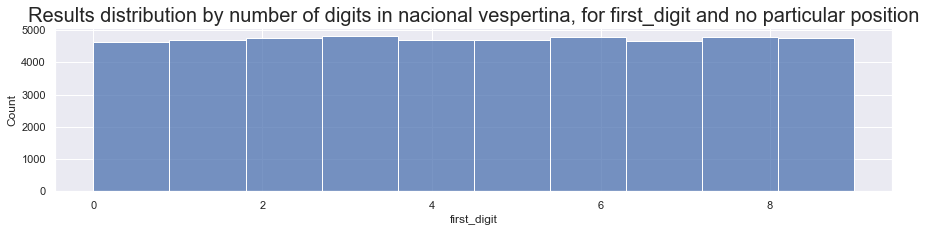

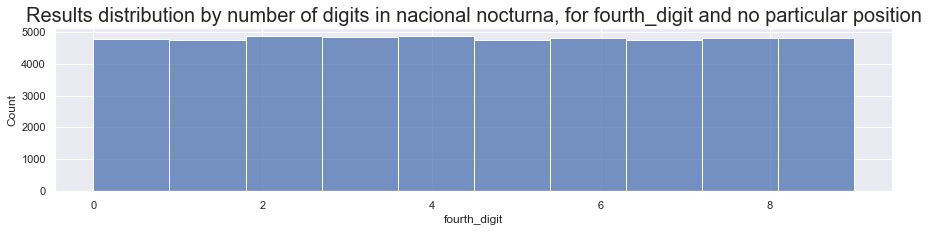

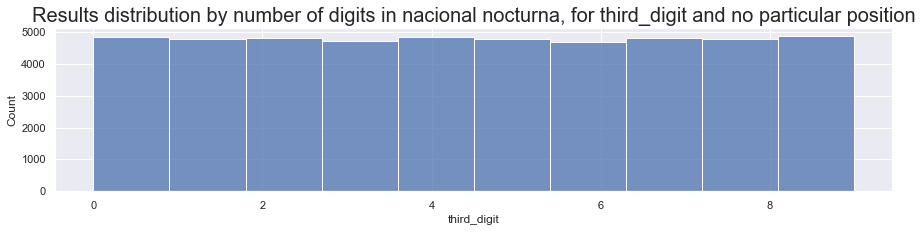

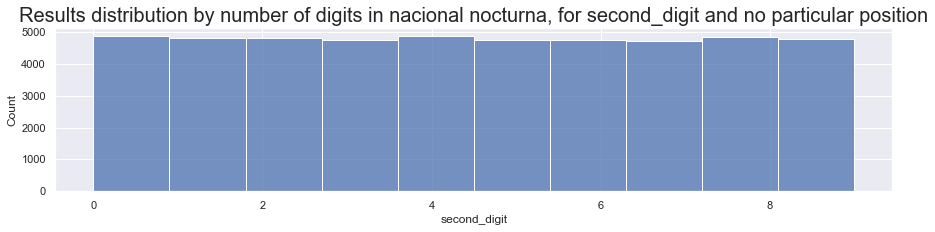

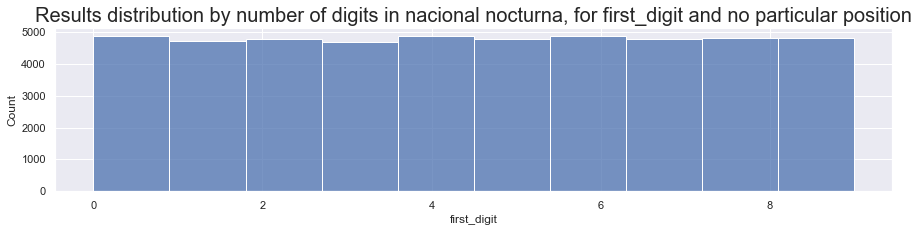

In [139]:
# Check the Quiniela's results distribution by periods
plot_period = 'primera'
display_distribution(plot_period, 'fourth_digit') # Total, no specific position
display_distribution(plot_period, 'third_digit') # Total, no specific position
display_distribution(plot_period, 'second_digit') # Total, no specific position
display_distribution(plot_period, 'first_digit') # Total, no specific position

plot_period = 'matutina'
display_distribution(plot_period, 'fourth_digit') # Total, no specific position
display_distribution(plot_period, 'third_digit') # Total, no specific position
display_distribution(plot_period, 'second_digit') # Total, no specific position
display_distribution(plot_period, 'first_digit') # Total, no specific position

plot_period = 'vespertina'
display_distribution(plot_period, 'fourth_digit') # Total, no specific position
display_distribution(plot_period, 'third_digit') # Total, no specific position
display_distribution(plot_period, 'second_digit') # Total, no specific position
display_distribution(plot_period, 'first_digit') # Total, no specific position

plot_period = 'nocturna'
display_distribution(plot_period, 'fourth_digit') # Total, no specific position
display_distribution(plot_period, 'third_digit') # Total, no specific position
display_distribution(plot_period, 'second_digit') # Total, no specific position
display_distribution(plot_period, 'first_digit') # Total, no specific position

In [212]:
# Get count of all values for each column (each of the digits), and stack the results in a single colum
column_totals = df_quiniela[['first_digit', 'second_digit', 'third_digit', 'fourth_digit']].apply(pd.Series.value_counts).stack()
# Get maximum and minimum amongst all value counts for all digits, and calculate the variance in percentage
max_variance = (column_totals.max() - column_totals.min()) / column_totals.min()
# Print the result in a nice format
print('Maximum variance between peaks for single digits occurrences is: {:.0%}'.format(max_variance)) 

Maximum variance between peaks for single digits occurrences is: 3%


<a id='individual_modes'>Check individual modes</a>

In [140]:
# Create table, grouping by period and calculating the mode for each digit
df_quiniela.groupby(['period']).agg(
    digit_1_mode=('first_digit', lambda x: x.mode()),
    digit_2_mode=('second_digit', lambda x: x.mode()),
    digit_3_mode=('third_digit', lambda x: x.mode()),
    digit_4_mode=('fourth_digit', lambda x: x.mode())
)

digit_1_mode  digit_2_mode  digit_3_mode  digit_4_mode
period                                                            
matutina               2             4             4             0
nocturna               0             4             9             4
primera                5             1             2             9
vespertina             3             1             6             8

> *No clear dominant occurrence of a particular digit in different digit positions or periods.*<br>
> *(Largest occurrence is 4, representing 25% of the total occurrences)*

Addressing the following questions:

>- *What is the distribution of the results by digit groups, for the first two position groups, taking as example the 'primera' period?*<br>
>&emsp;Looking at more than one digit, distributions are multimodal, with larger variations for results in the first position.<br>
>
>- *What are the modes for the digits in each period, by position group?*<br>
>&emsp;See [position groups modes](#position_groups_modes).<br>

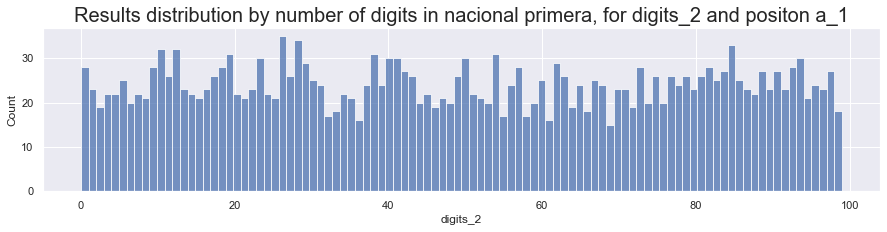

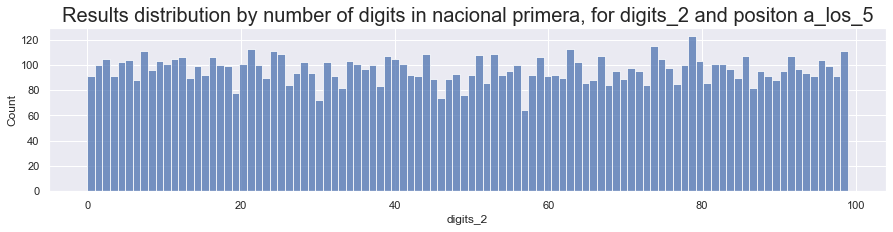

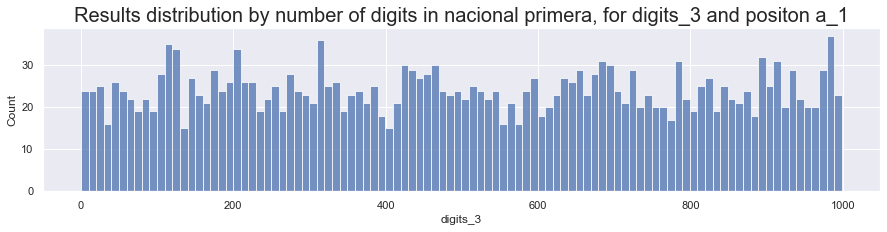

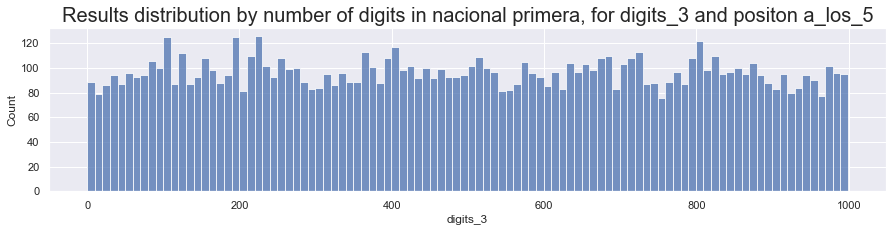

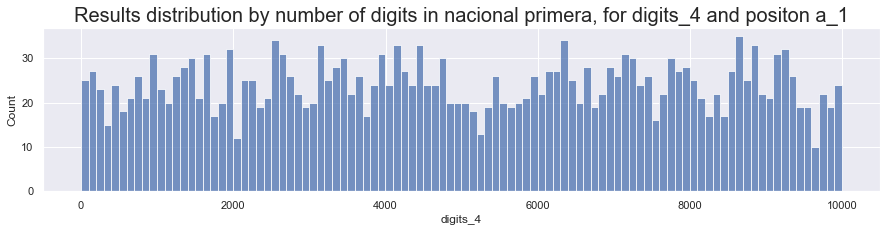

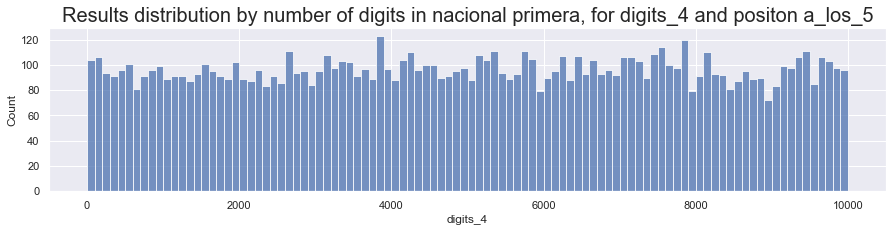

In [141]:
# Check the Quiniela's results distribution by position groups
plot_period = 'primera'
display_distribution(plot_period, 'digits_2', 'a_1')
display_distribution(plot_period, 'digits_2', 'a_los_5')
display_distribution(plot_period, 'digits_3', 'a_1')
display_distribution(plot_period, 'digits_3', 'a_los_5')
display_distribution(plot_period, 'digits_4', 'a_1')
display_distribution(plot_period, 'digits_4', 'a_los_5')

<a id='position_groups_modes'>Check modes by position group</a>

In [142]:
# Set width of columns to fit all values
pd.set_option('max_colwidth', None)
# Create table, grouping by period and calculating the mode for each grouped digits, for the first position
df_quiniela[df_quiniela['position_group'] == 'a_1'].groupby(['position_group', 'period']).agg(
    # list() is used to avoid errors. Arrays are not supported as a response
    digit_2_mode=('digits_2', lambda x: list(x.mode())), 
    digit_3_mode=('digits_3', lambda x: list(x.mode())),
    digit_4_mode=('digits_4', lambda x: list(x.mode()))
)

digit_2_mode     digit_3_mode  \
position_group period                                     
a_1            matutina       [11, 44]       [544, 711]   
               nocturna           [41]       [427, 702]   
               primera            [26]  [585, 894, 931]   
               vespertina         [32]            [611]   

                                                                                                                                          digit_4_mode  
position_group period                                                                                                                                   
a_1            matutina    [231, 305, 738, 1334, 1754, 2179, 2188, 2344, 2946, 3699, 3959, 4371, 5126, 5470, 5546, 6140, 6307, 6934, 9458, 9711, 9782]  
               nocturna                                                                                                                         [1858]  
               primera                                                                                                                          [1674]  
               vespertina                                                                                                                 [6602, 8899]

> *Since results are always a 4 digit 'number' for each position, and modes are not repeated in groups with lesser digits, we can assume that there is no one result that has been drawned significantly more than the others.*
>
> *For example, if '1234' would have been the most drawn number overall, mode for 3 digits should have been '234' and mode for 2 digits, '34'.*

### Add day, day of the week, and month
This new features will allow us to analyze occurrences by calendar day, the day of the week, and also by month

In [213]:
# Add -calendar- day
df_quiniela['calendar_day'] = df_quiniela['lottery_date'].apply(lambda x: int(x.strftime('%d')))
# Add day of the week - Monday is 0 and Sunday is 6
df_quiniela['day_of_week'] = df_quiniela['lottery_date'].apply(lambda x: int(x.weekday()))
# Add month
df_quiniela['month'] = df_quiniela['lottery_date'].apply(lambda x: int(x.strftime('%m')))

df_quiniela.head()

lottery_date  quiniela   period  position result  digits_4  digits_3  \
0   2014-11-01  nacional  primera         1   3940      3940       940   
1   2014-11-01  nacional  primera         2   6857      6857       857   
2   2014-11-01  nacional  primera         3   0609       609       609   
3   2014-11-01  nacional  primera         4   8018      8018        18   
4   2014-11-01  nacional  primera         5   3232      3232       232   

   digits_2  first_digit  second_digit  third_digit  fourth_digit  \
0        40            3             9            4             0   
1        57            6             8            5             7   
2         9            0             6            0             9   
3        18            8             0            1             8   
4        32            3             2            3             2   

  position_group  calendar_day  day_of_week  month  
0            a_1             1            5     11  
1        a_los_5             1            5     11  
2        a_los_5             1            5     11  
3        a_los_5             1            5     11  
4        a_los_5             1            5     11

### Check distributions and statistics

In [265]:
# Create function to display distributions by the different days of the week, taking the dataframe, the number column, period (optional), and position (optional) as input
def display_occurrences_in_time(df_in, number_in, period_in='', position_in=''):

    # Determine the title text to be displayed, depending on what -if any- position group and period are passed as an argument
    position_string = ('positon ' + position_in) if position_in != '' else 'no particular position'
    period_string = period_in if period_in != '' else 'for all periods'

    # Create 6 subplots (3 rows by 2 columns), one for each day of the week
    fig, ax = plt.subplots(3,2, figsize=(30,15))
    plt.subplots_adjust(top=1.1)

    # Define the title of the chart, based on the selections, to make it descriptive of what you are looking at
    plt.suptitle('Results distribution by number of digits in {} {}, for {} and {}'.format(quiniela_name, period_string, number_in, position_string), fontsize=20, y=1.2)

    # Create a temporary dataframe, filtering by the period and position group passed as an argument to the function -if any-
    df_temp = (
        df_in[
            (df_in['period'] == period_in if period_in != '' else df_in['period']) 
            & (df_in['position_group'] == position_in if position_in != '' else df_in['position_group'])
            ].sort_values(by=number_in)
        ) if ((period_in != '') & (position_in != '')) else df_in

    # Change the number of bins based on number of digits: 100 if it is more than 1, 10 if it is one digit
    bin_number = 100 if 'digits' in number_in else 10

    # Filter and create dataframes for each day of the week
    df_mon = df_temp[df_temp['day_of_week'] == 0]
    df_tue = df_temp[df_temp['day_of_week'] == 1]
    df_wed = df_temp[df_temp['day_of_week'] == 2]
    df_thu = df_temp[df_temp['day_of_week'] == 3]
    df_fri = df_temp[df_temp['day_of_week'] == 4]
    df_sat = df_temp[df_temp['day_of_week'] == 5]

    # Create the histograms for the selections and for each day
    sns.histplot(data=df_mon, x=df_mon[number_in], bins=bin_number, ax=ax[0,0]).set(title='Monday', xlabel=None)
    sns.histplot(data=df_tue, x=df_tue[number_in], bins=bin_number, ax=ax[0,1]).set(title='Tuesday', xlabel=None)
    sns.histplot(data=df_wed, x=df_wed[number_in], bins=bin_number, ax=ax[1,0]).set(title='Wednesday', xlabel=None)
    sns.histplot(data=df_thu, x=df_thu[number_in], bins=bin_number, ax=ax[1,1]).set(title='Thursday', xlabel=None)
    sns.histplot(data=df_fri, x=df_fri[number_in], bins=bin_number, ax=ax[2,0]).set(title='Friday', xlabel=None)
    sns.histplot(data=df_sat, x=df_sat[number_in], bins=bin_number, ax=ax[2,1]).set(title='Saturday', xlabel=None)

    return plt.show()

Addressing the following questions:

>- *What is the distribution, by day of the week, of the results by digit groups (2 and 3 digits), for the first position, taking as example the 'primera' period?*<br>
>&emsp;Distributions are multimodal.<br>
>
>- *What are the modes for the digits in each period, by position group and day of the week?*<br>
>&emsp;See [modes by the day of the week](#day_of_week_modes).<br>

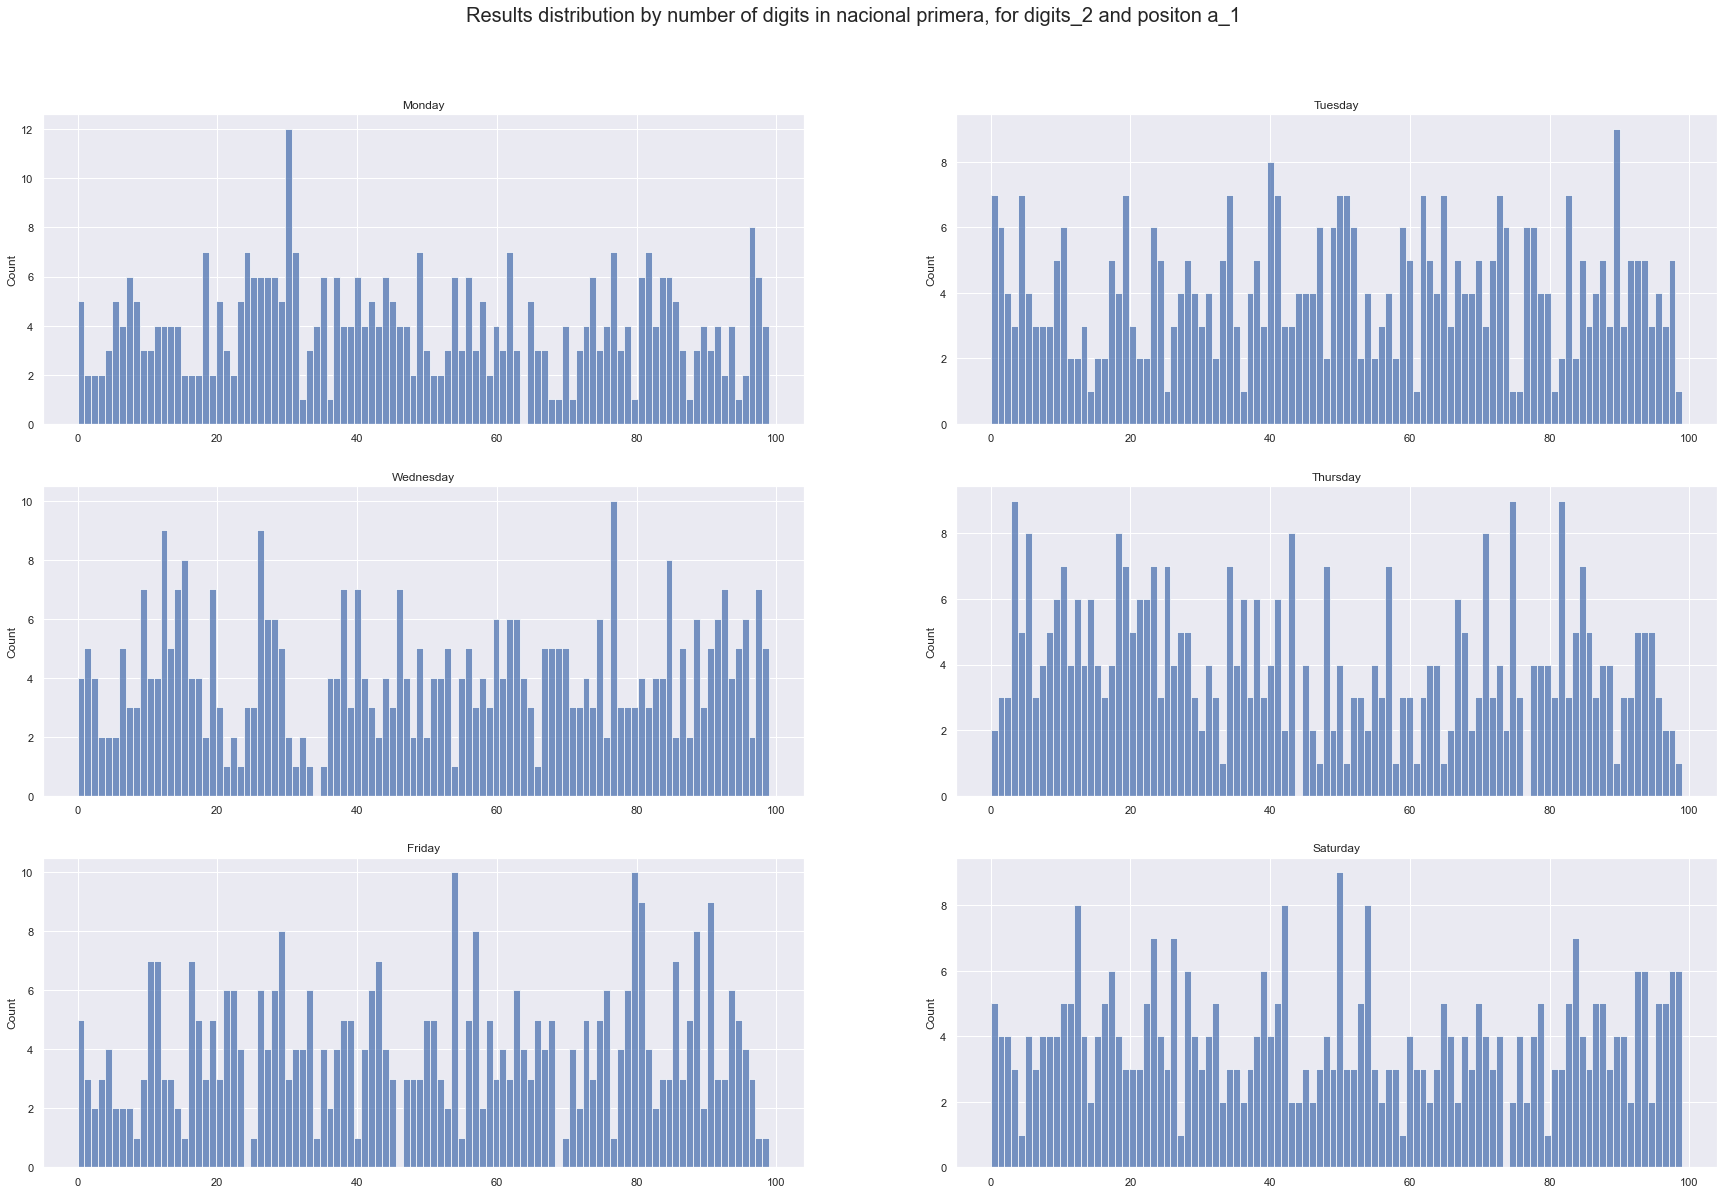

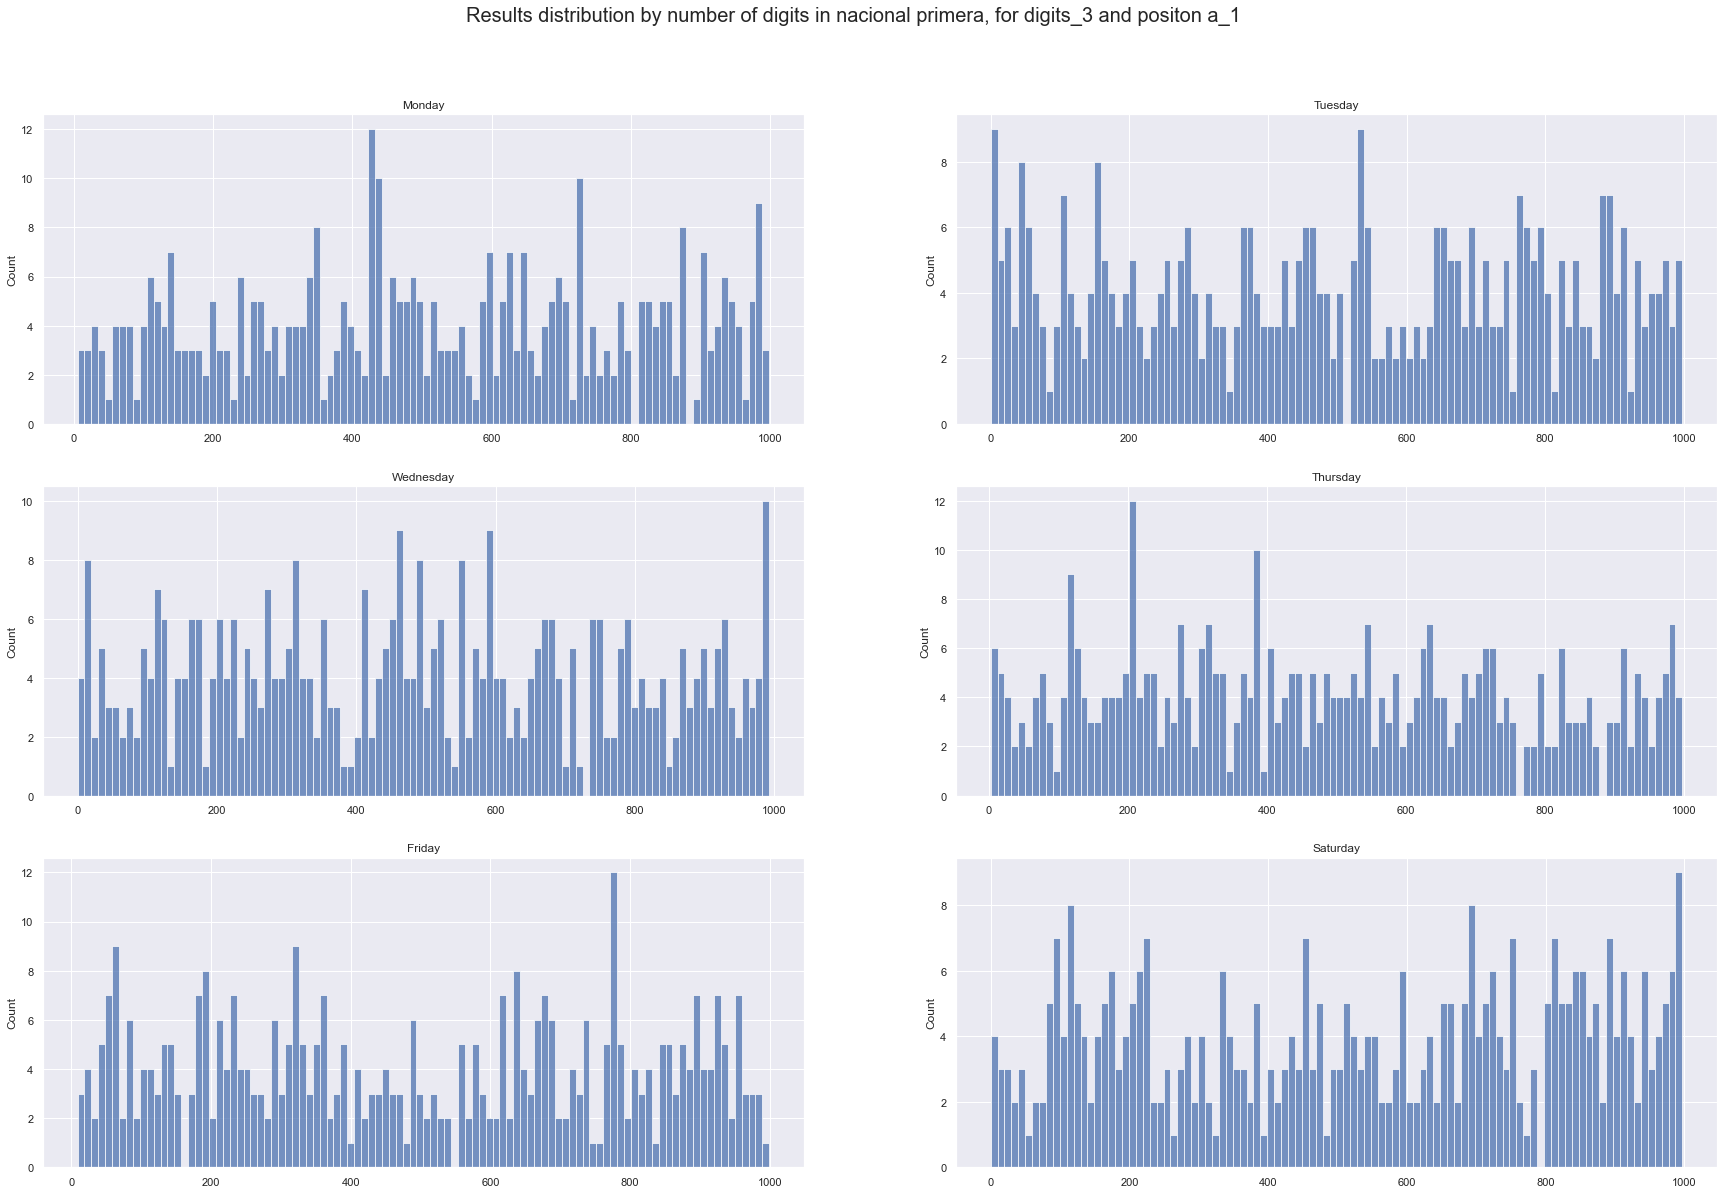

In [266]:
# Check distributions for 2 and 3 digits, at the first position, by the day of the week
display_occurrences_in_time(df_quiniela, 'digits_2', 'primera', 'a_1')
display_occurrences_in_time(df_quiniela, 'digits_3', 'primera', 'a_1')

Addressing the following question:

>- *What is the distribution of the results by digit groups (2 digits), for the first position, taking as example the 'vespertina' period?*<br>
>&emsp;Distributions are multimodal.<br>

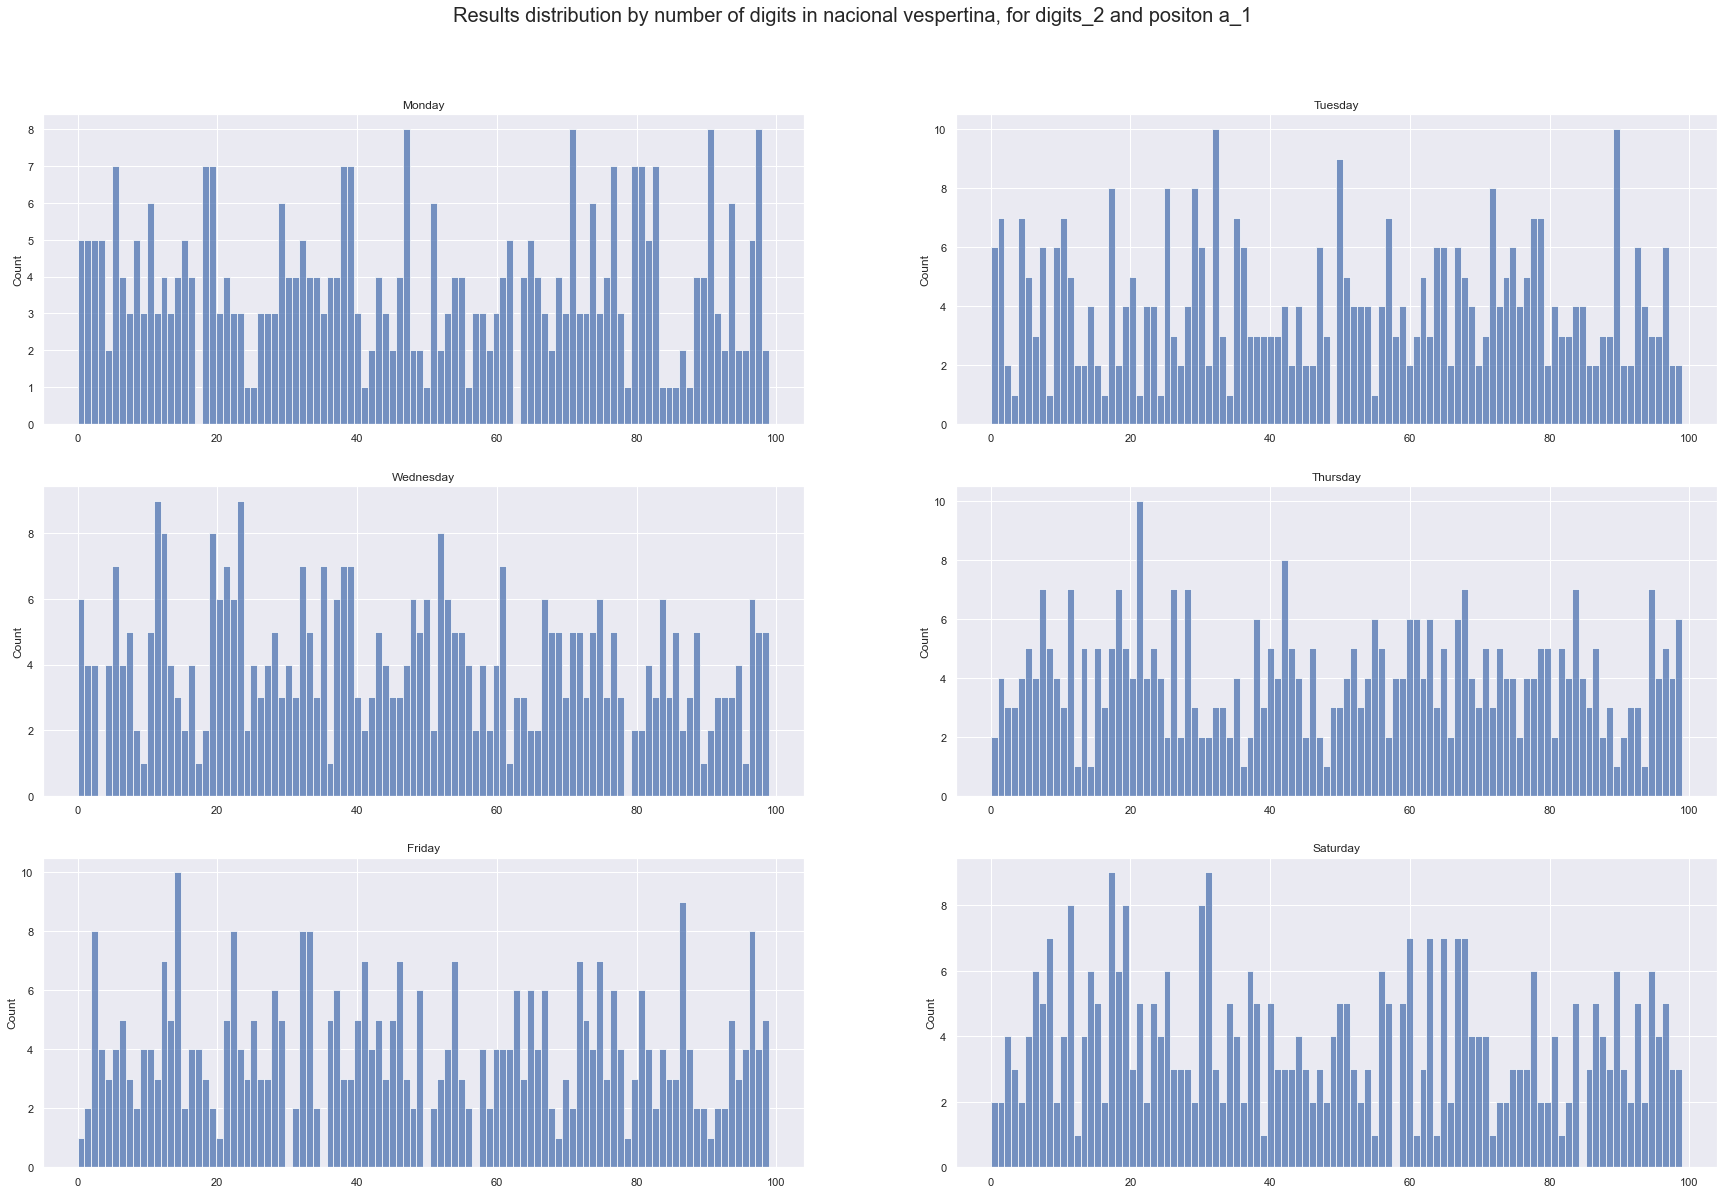

In [267]:
# Check distributions for 2 digits, at the first position, by the day of the week
display_occurrences_in_time(df_quiniela, 'digits_2', 'vespertina', 'a_1')

<a id='day_of_week_modes'>Check modes by the day of the week</a>

In [201]:
# Create a function to compare if modes from a certain group of digits, are also included in the following group (i.e., 2 digits in the 3 digits columns, and so on)
def check_modes(df_in, digit_2_mode_in, digit_3_mode_in, digit_4_mode_in):

    # Iterate through all the rows in the dataframe
    for index, row in df_in.iterrows():

        # Set counters to record occurrences of matches between the different columns
        count_2_3 = 0
        count_2_3_4 = 0
        count_3_4 = 0

        # If a number is also contained in the next digit column, add 1. For example, if 51 (2 digits) is contained in 251 (3 digits); and, if 251 (3 digits) is contained in 4251 (4 digits).
        for d_2 in row[digit_2_mode_in]:
            for d_3 in row[digit_3_mode_in]:
                if str(d_2) == str(d_3)[-2:]:
                    count_2_3 += 1 # Add 1, stating that the 2 digit number, was found in the 3 digit column, as the most right figures
                    for d_4 in row[digit_4_mode_in]:
                        if str(d_3) == str(d_4)[-3:]:
                            count_2_3_4 += 1 # Add 1, stating that the 2 digit number, was found in the 3 digit column and, also, that this 3 digit number, was found in the 4 digit column, as the most right figures
        
        for d_3 in row[digit_3_mode_in]:
            for d_4 in row[digit_4_mode_in]:
                        if str(d_3) == str(d_4)[-3:]:
                            count_3_4 += 1 # Add 1, stating that the 3 digit number, was found in the 4 digit column, as the most right figures
        
        # Add total matches found to the respective columns
        df_in.loc[index, '2&3'] = count_2_3
        df_in.loc[index, '2&3&4'] = count_2_3_4
        df_in.loc[index, '3&4'] = count_3_4

    return df_in

In [202]:
# Set width of columns to fit all values
pd.set_option('max_colwidth', None)
# Create table, grouping by period and calculating the mode for each grouped digits, for the first position
df_modes = df_quiniela[df_quiniela['position_group'] == 'a_1'].groupby(['position_group', 'period', 'day_of_week']).agg(
    # list() is used to avoid errors. Arrays are not supported as a response
    digit_2_mode=('digits_2', lambda x: list(x.mode())), 
    digit_3_mode=('digits_3', lambda x: list(x.mode())),
    digit_4_mode=('digits_4', lambda x: list(x.mode()))
)

In [203]:
# Create table, displaying the modes for each of the digit groups, and the matches found between these modes, in the different columns of the table
check_modes(df_modes, 'digit_2_mode', 'digit_3_mode', 'digit_4_mode')

digit_2_mode  \
position_group period     day_of_week                     
a_1            matutina   0                        [71]   
                          1                        [11]   
                          2                        [18]   
                          3                    [44, 58]   
                          4                     [3, 11]   
                          5                        [12]   
               nocturna   0              [3, 5, 32, 71]   
                          1                        [96]   
                          2                        [64]   
                          3                        [29]   
                          4                    [41, 98]   
                          5                    [41, 59]   
               primera    0                        [30]   
                          1                        [90]   
                          2                        [77]   
                          3                 [3, 75, 82]   
                          4                    [54, 80]   
                          5                        [50]   
               vespertina 0            [47, 71, 91, 98]   
                          1                    [32, 90]   
                          2                    [11, 23]   
                          3                        [21]   
                          4                        [14]   
                          5                    [17, 31]   

                                                                       digit_3_mode  \
position_group period     day_of_week                                                 
a_1            matutina   0                                                   [171]   
                          1                                                   [496]   
                          2                                         [204, 612, 946]   
                          3             [5, 172, 188, 348, 439, 458, 511, 709, 980]   
                          4            [93, 217, 218, 308, 348, 544, 636, 654, 737]   
                          5                [189, 453, 565, 610, 694, 706, 725, 810]   
               nocturna   0                                                   [703]   
                          1                                                   [294]   
                          2                                                   [711]   
                          3                                                   [215]   
                          4                           [86, 155, 204, 331, 441, 869]   
                          5                                                   [259]   
               primera    0                                         [430, 877, 908]   
                          1                                [17, 200, 250, 460, 952]   
                          2                [226, 315, 328, 455, 496, 592, 785, 993]   
                          3                     [194, 203, 314, 323, 585, 696, 967]   
                          4                                              [781, 894]   
                          5                                                   [750]   
               vespertina 0                                                   [283]   
                          1                      [57, 336, 517, 647, 690, 917, 978]   
                          2                                                    [11]   
                          3                                                   [555]   
                          4                                               [45, 614]   
                          5                                                   [425]   

                                                                                                 digit_4_mode  \
position_group period     day_of_week                                                                           
a_1            matu

> *There are certain days in which a particular mode is predominant as the result, however, these are few, not significant occurrences.<br>*
>
> *No clear conclusion can be drawn as to whether or not there is a pattern in the occurrence of certain results.*

Addressing the following question:

> - *Focusing on 2 digit results, what is the distribution of modes, for the first position, between days of the week?*<br>
> Monday and Tuesday are modal, and the rest of the days uniform. Seems like there is a higher probability of obtaining a 71 on Mondays and a 90 on Tuesday, than the rest of the numbers.

In [283]:
# Create temporary dataframe to include all modes for 2 digit values occurring at a specific day of the week
df_temp_2_digits = pd.DataFrame(columns=['day_of_week', 'digits_2_mode'])

# Create an index counter to generate autoincremental values for each row index
index_number = 0

# Iterate through the 'modes dataframe'
for index, row in df_modes.iterrows():

    # Add all modes and the day of the week to the new dataframe
    for number in row['digit_2_mode']:
        df_temp_2_digits.loc[index_number] = [index[2], number]
        index_number += 1

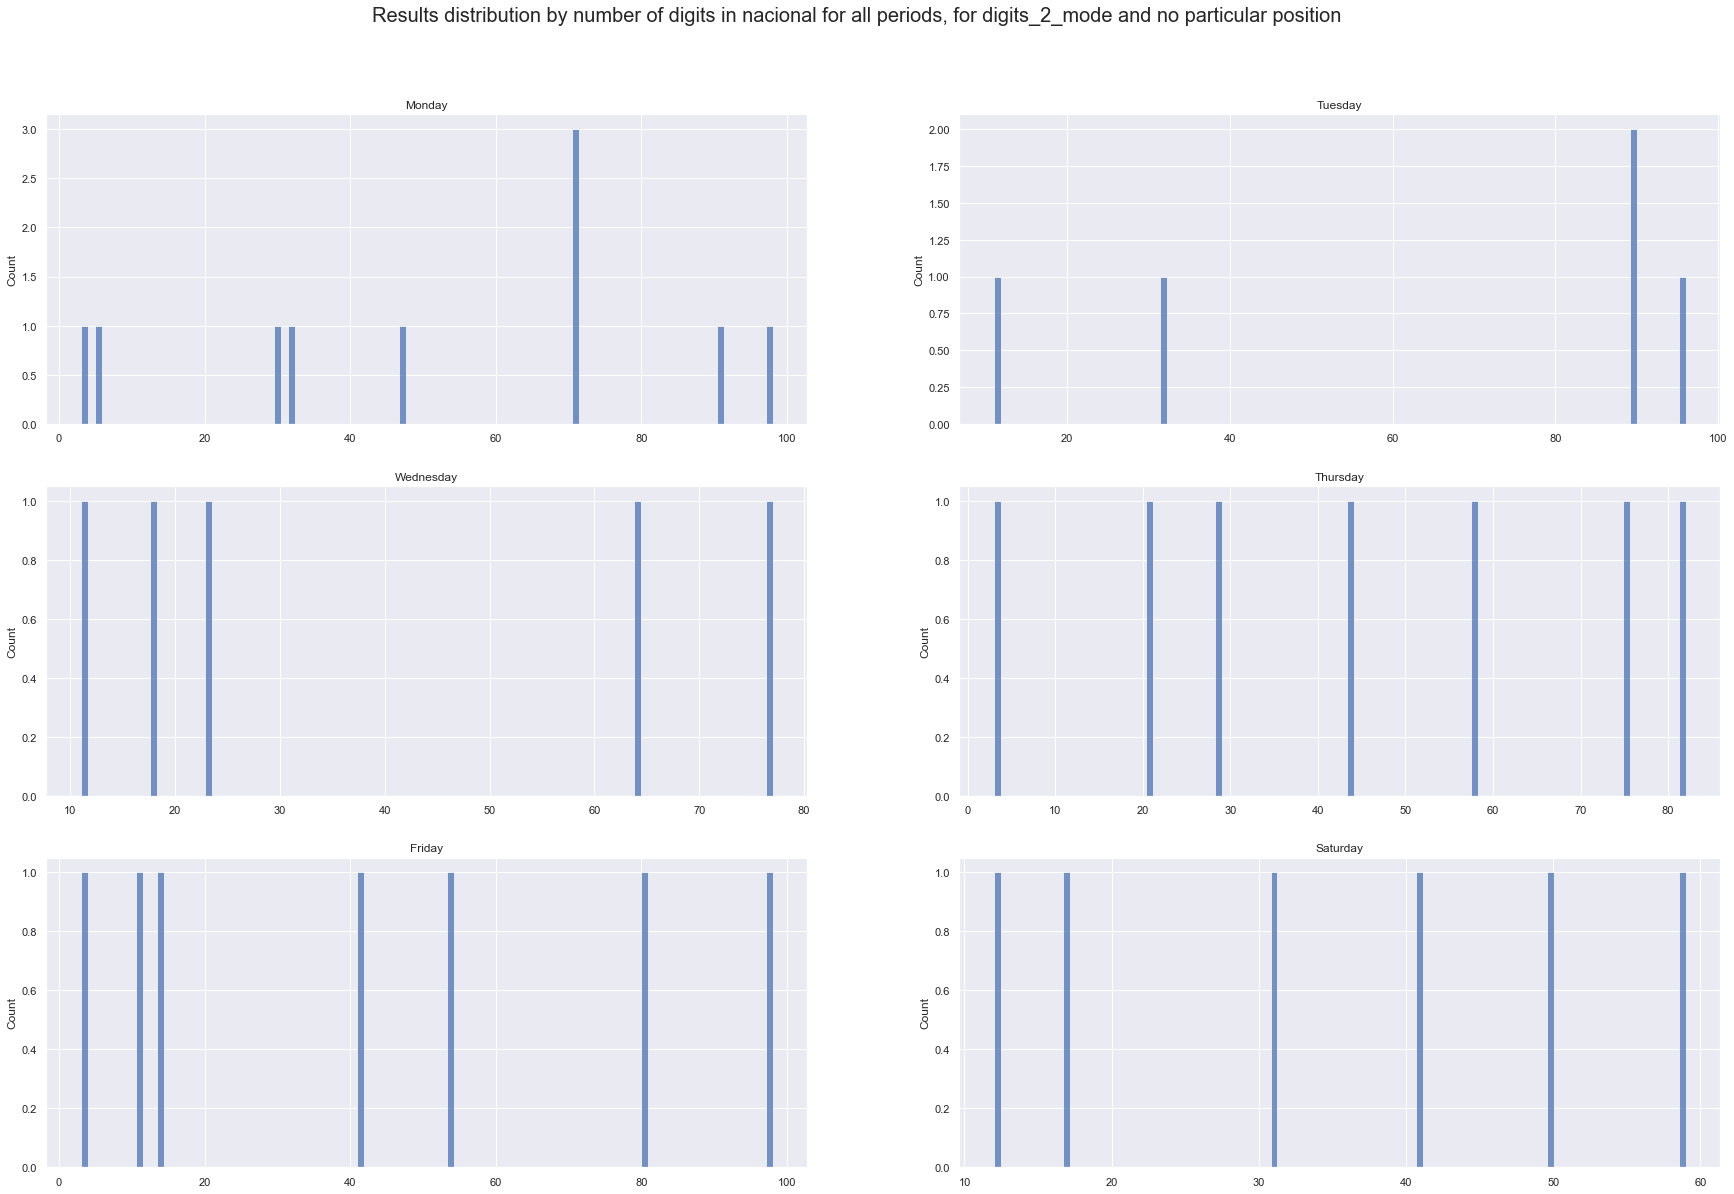

In [285]:
# Check distributions for 2 digit modes by the day of the week
display_occurrences_in_time(df_temp_2_digits, 'digits_2_mode')

Addressing the following questions:

>- *What is the frequency of the 2 digits results, by different periods, focusing only in the first position group?*<br>
>&emsp;No pattern can be visually identified, frequency variation is not significant between different numbers.<br>

In [396]:
def plot_scatter(df_in, x_axis_in, y_axis_in, period_in=''):

    # Filter dataframe based on period -if any-
    if period_in != '':
        df_temp = df_quiniela[(df_quiniela['period'] == period_in) & (df_quiniela[df_quiniela['position_group'] == "a_1"])]
    else:
        df_temp = df_quiniela[df_quiniela['position_group'] == "a_1"]

    # Count and store the number of occurrences of each 2 digit number
    digits_count = df_temp.groupby([y_axis_in, x_axis_in]).size().reset_index(name='frequency')

    # Create a scatter plot for the data
    sns.relplot(x=x_axis_in, y=y_axis_in, size=digits_count['frequency'], sizes=(50,1000), data=digits_count, height=20, aspect=2, alpha=0.5)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    return plt.show()


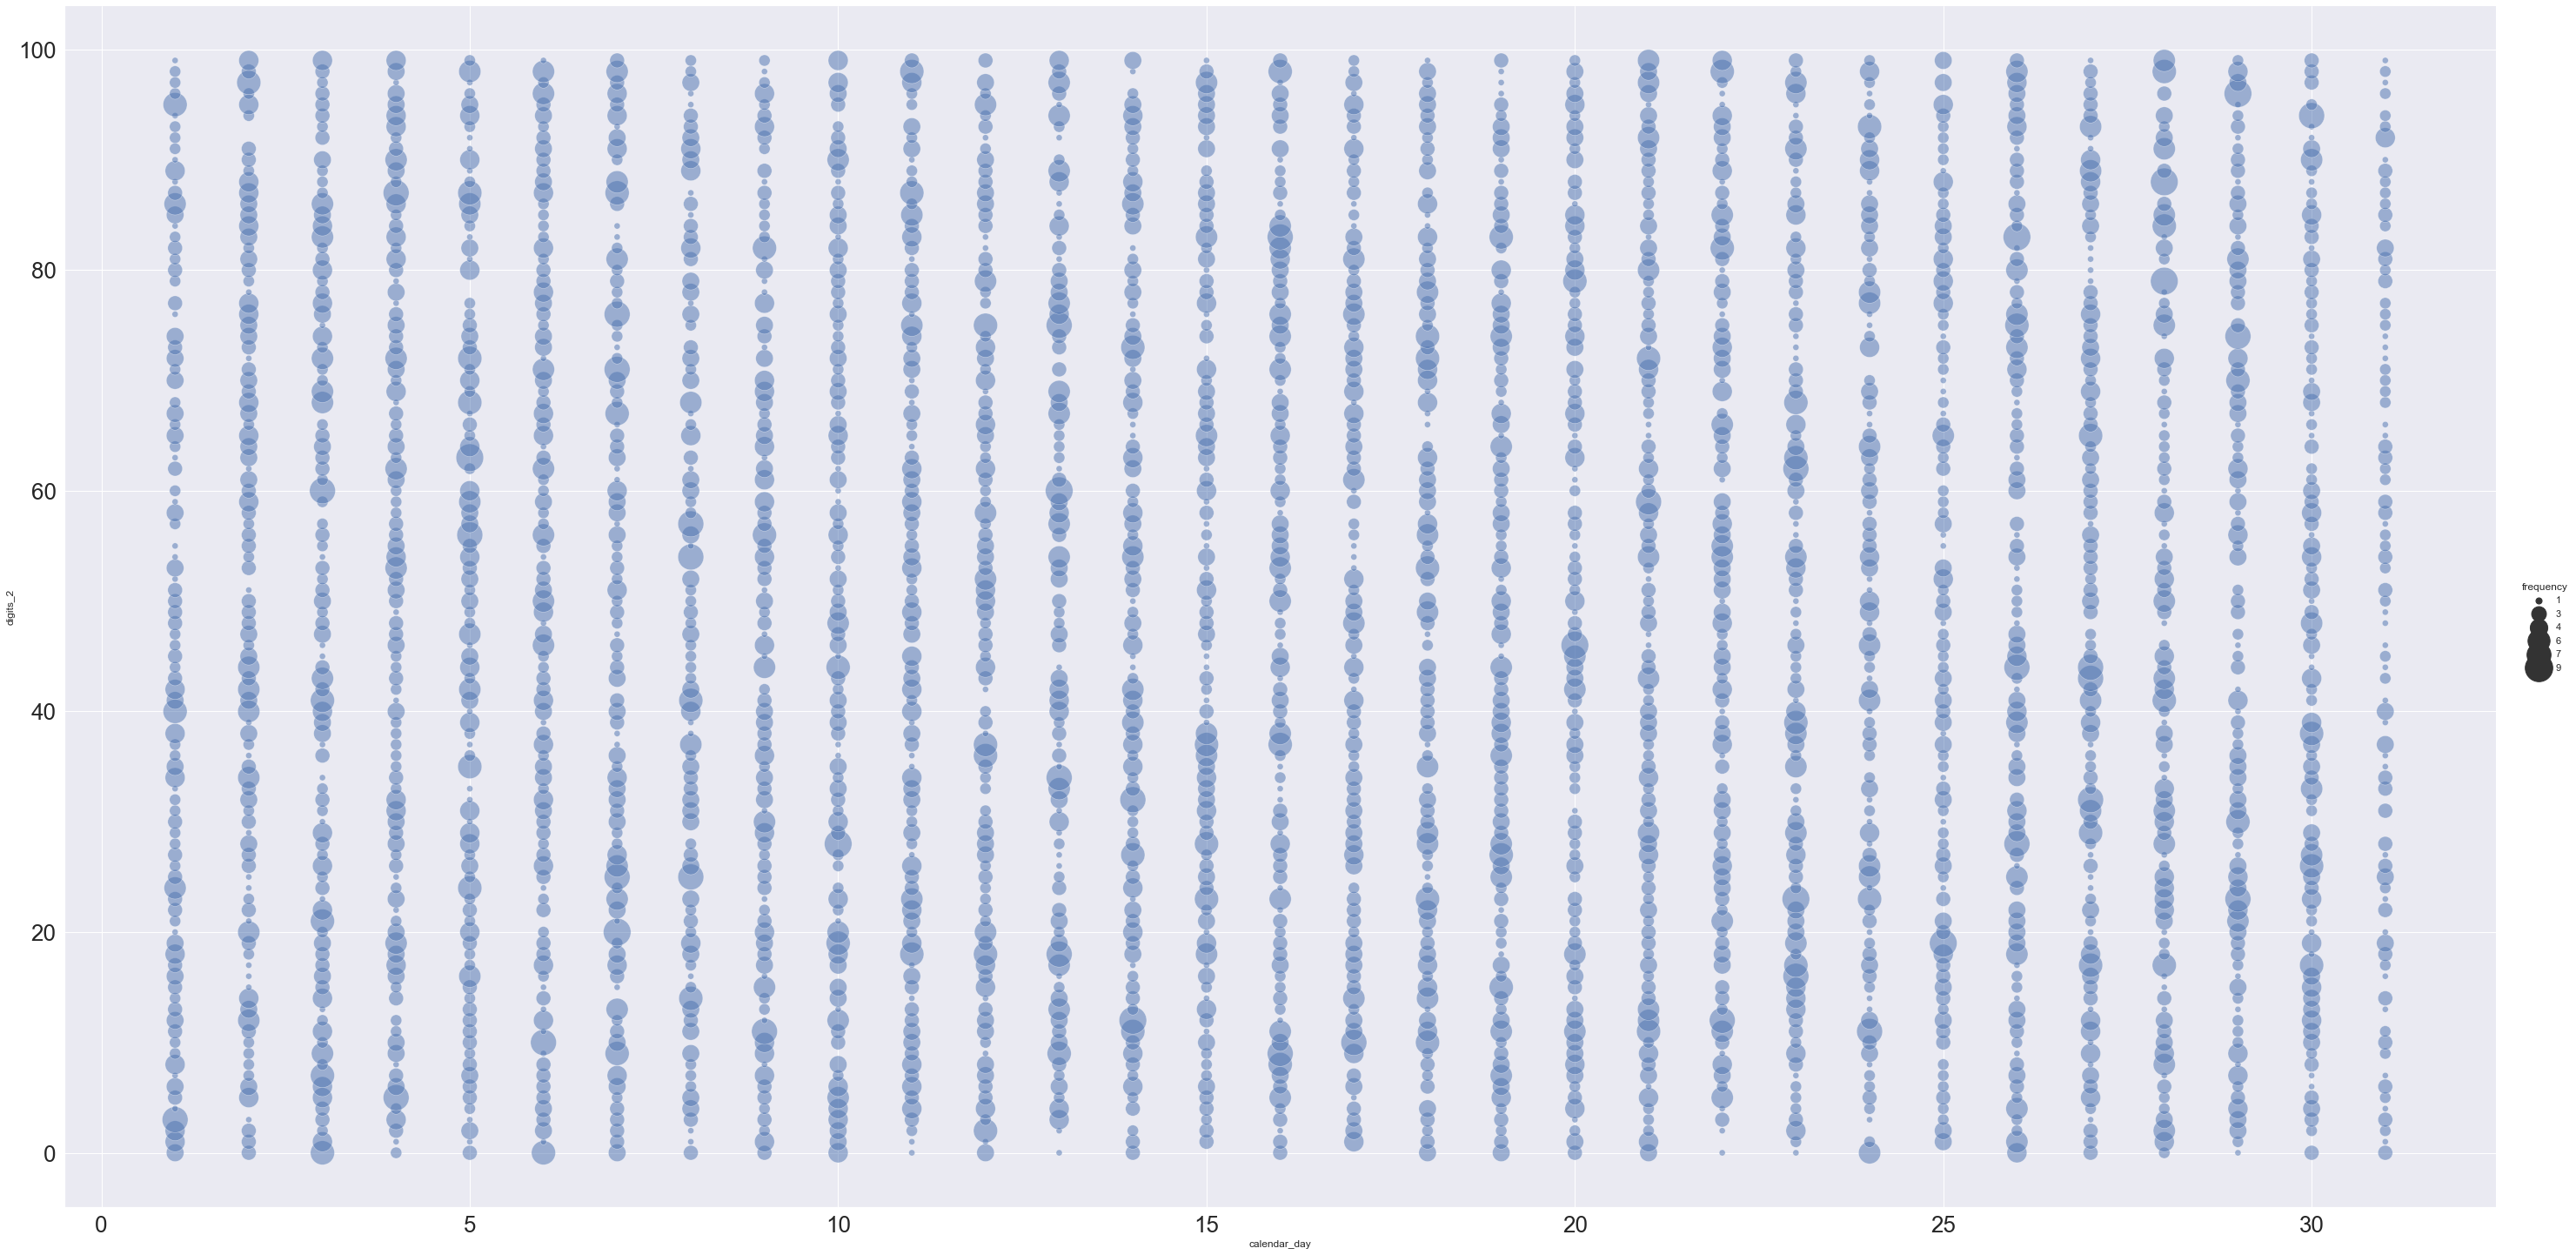

In [397]:
plot_scatter(df_quiniela, 'calendar_day', 'digits_2')

In [399]:
plot_scatter(df_quiniela, 'calendar_day', 'digits_2', 'primera')

MemoryError: Unable to allocate 13.6 GiB for an array with shape (191060, 9553) and data type float64

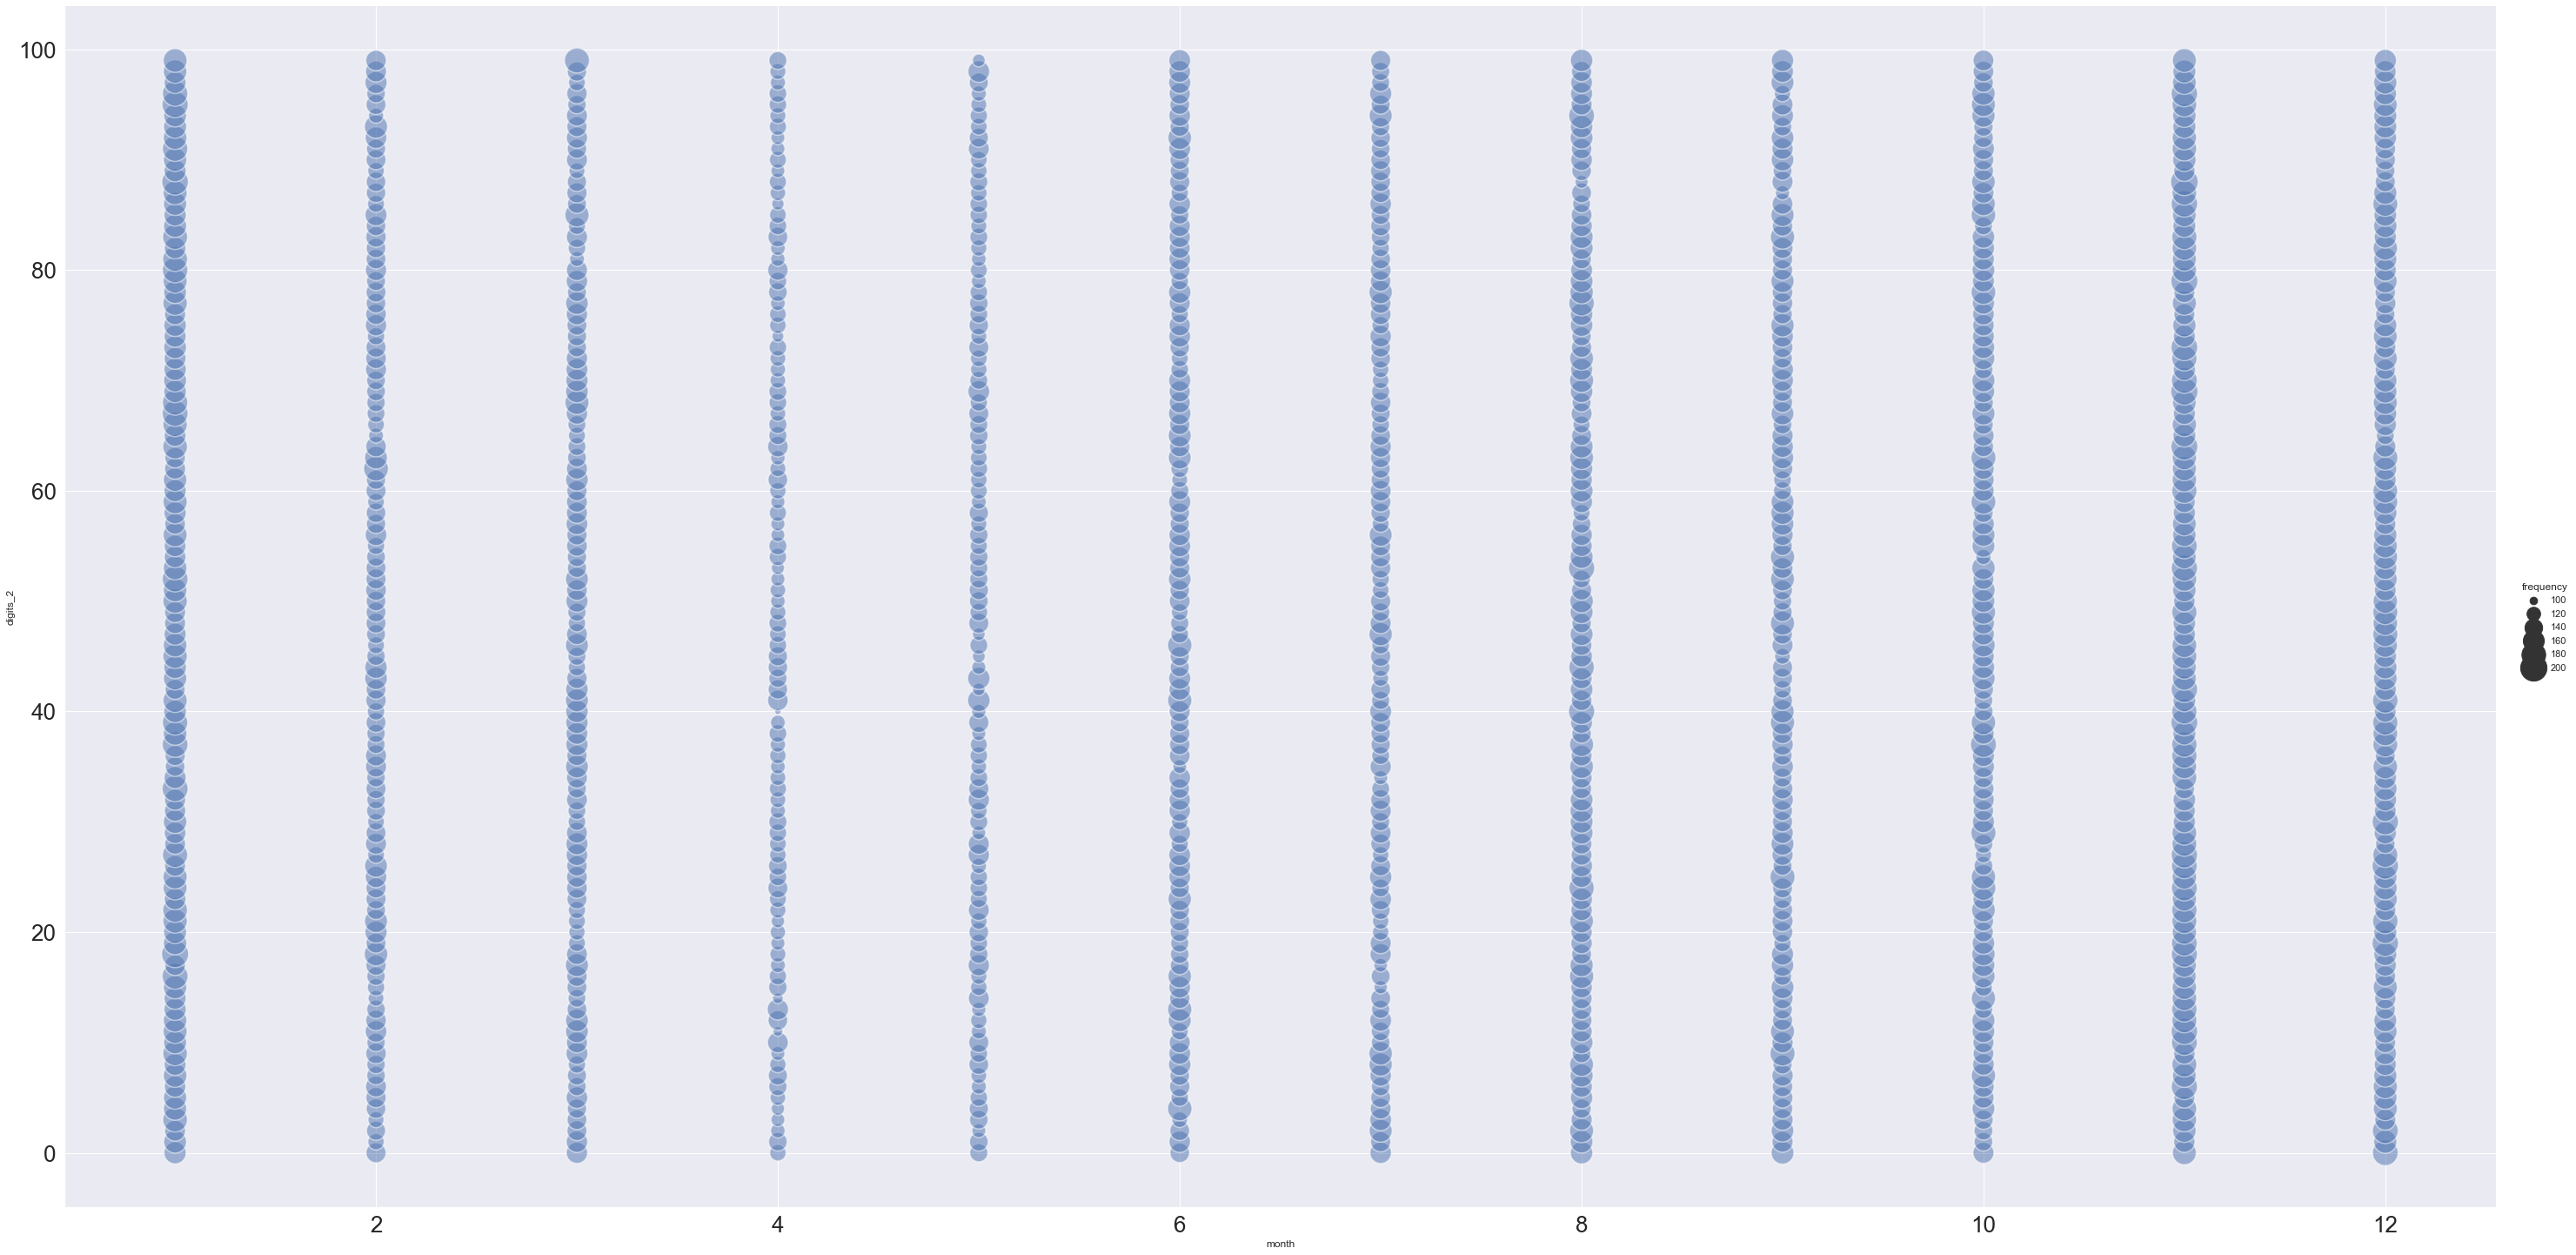

In [370]:
plot_scatter(df_quiniela, 'month', 'digits_2')

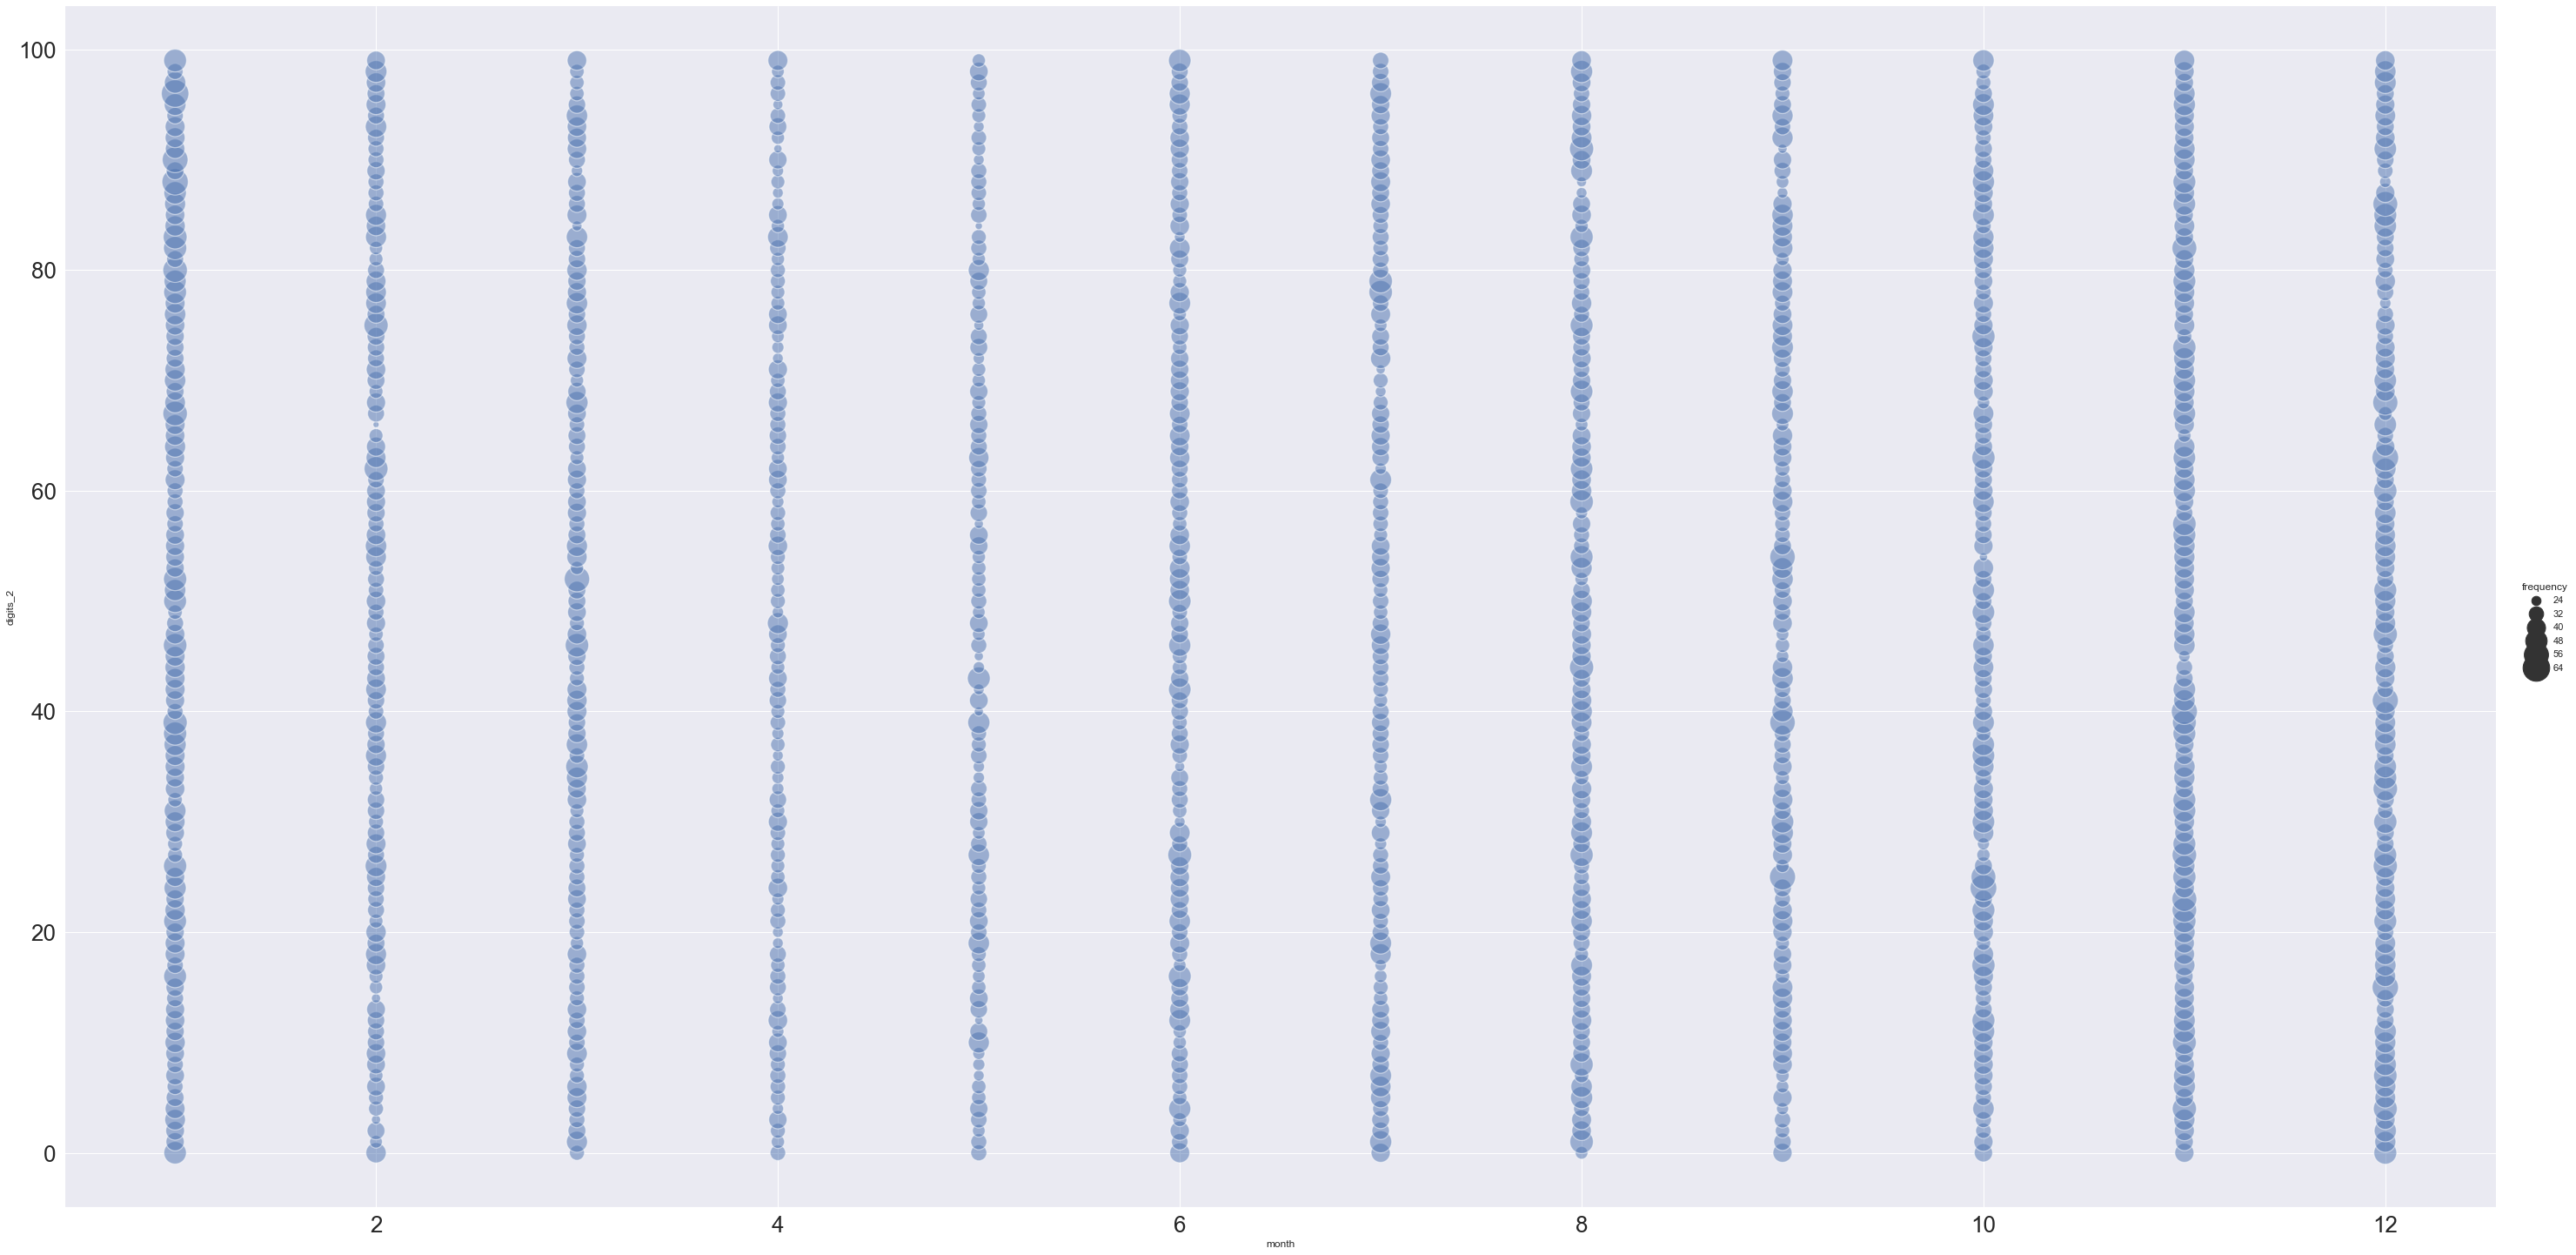

In [375]:
plot_scatter(df_quiniela, 'month', 'digits_2', 'primera')

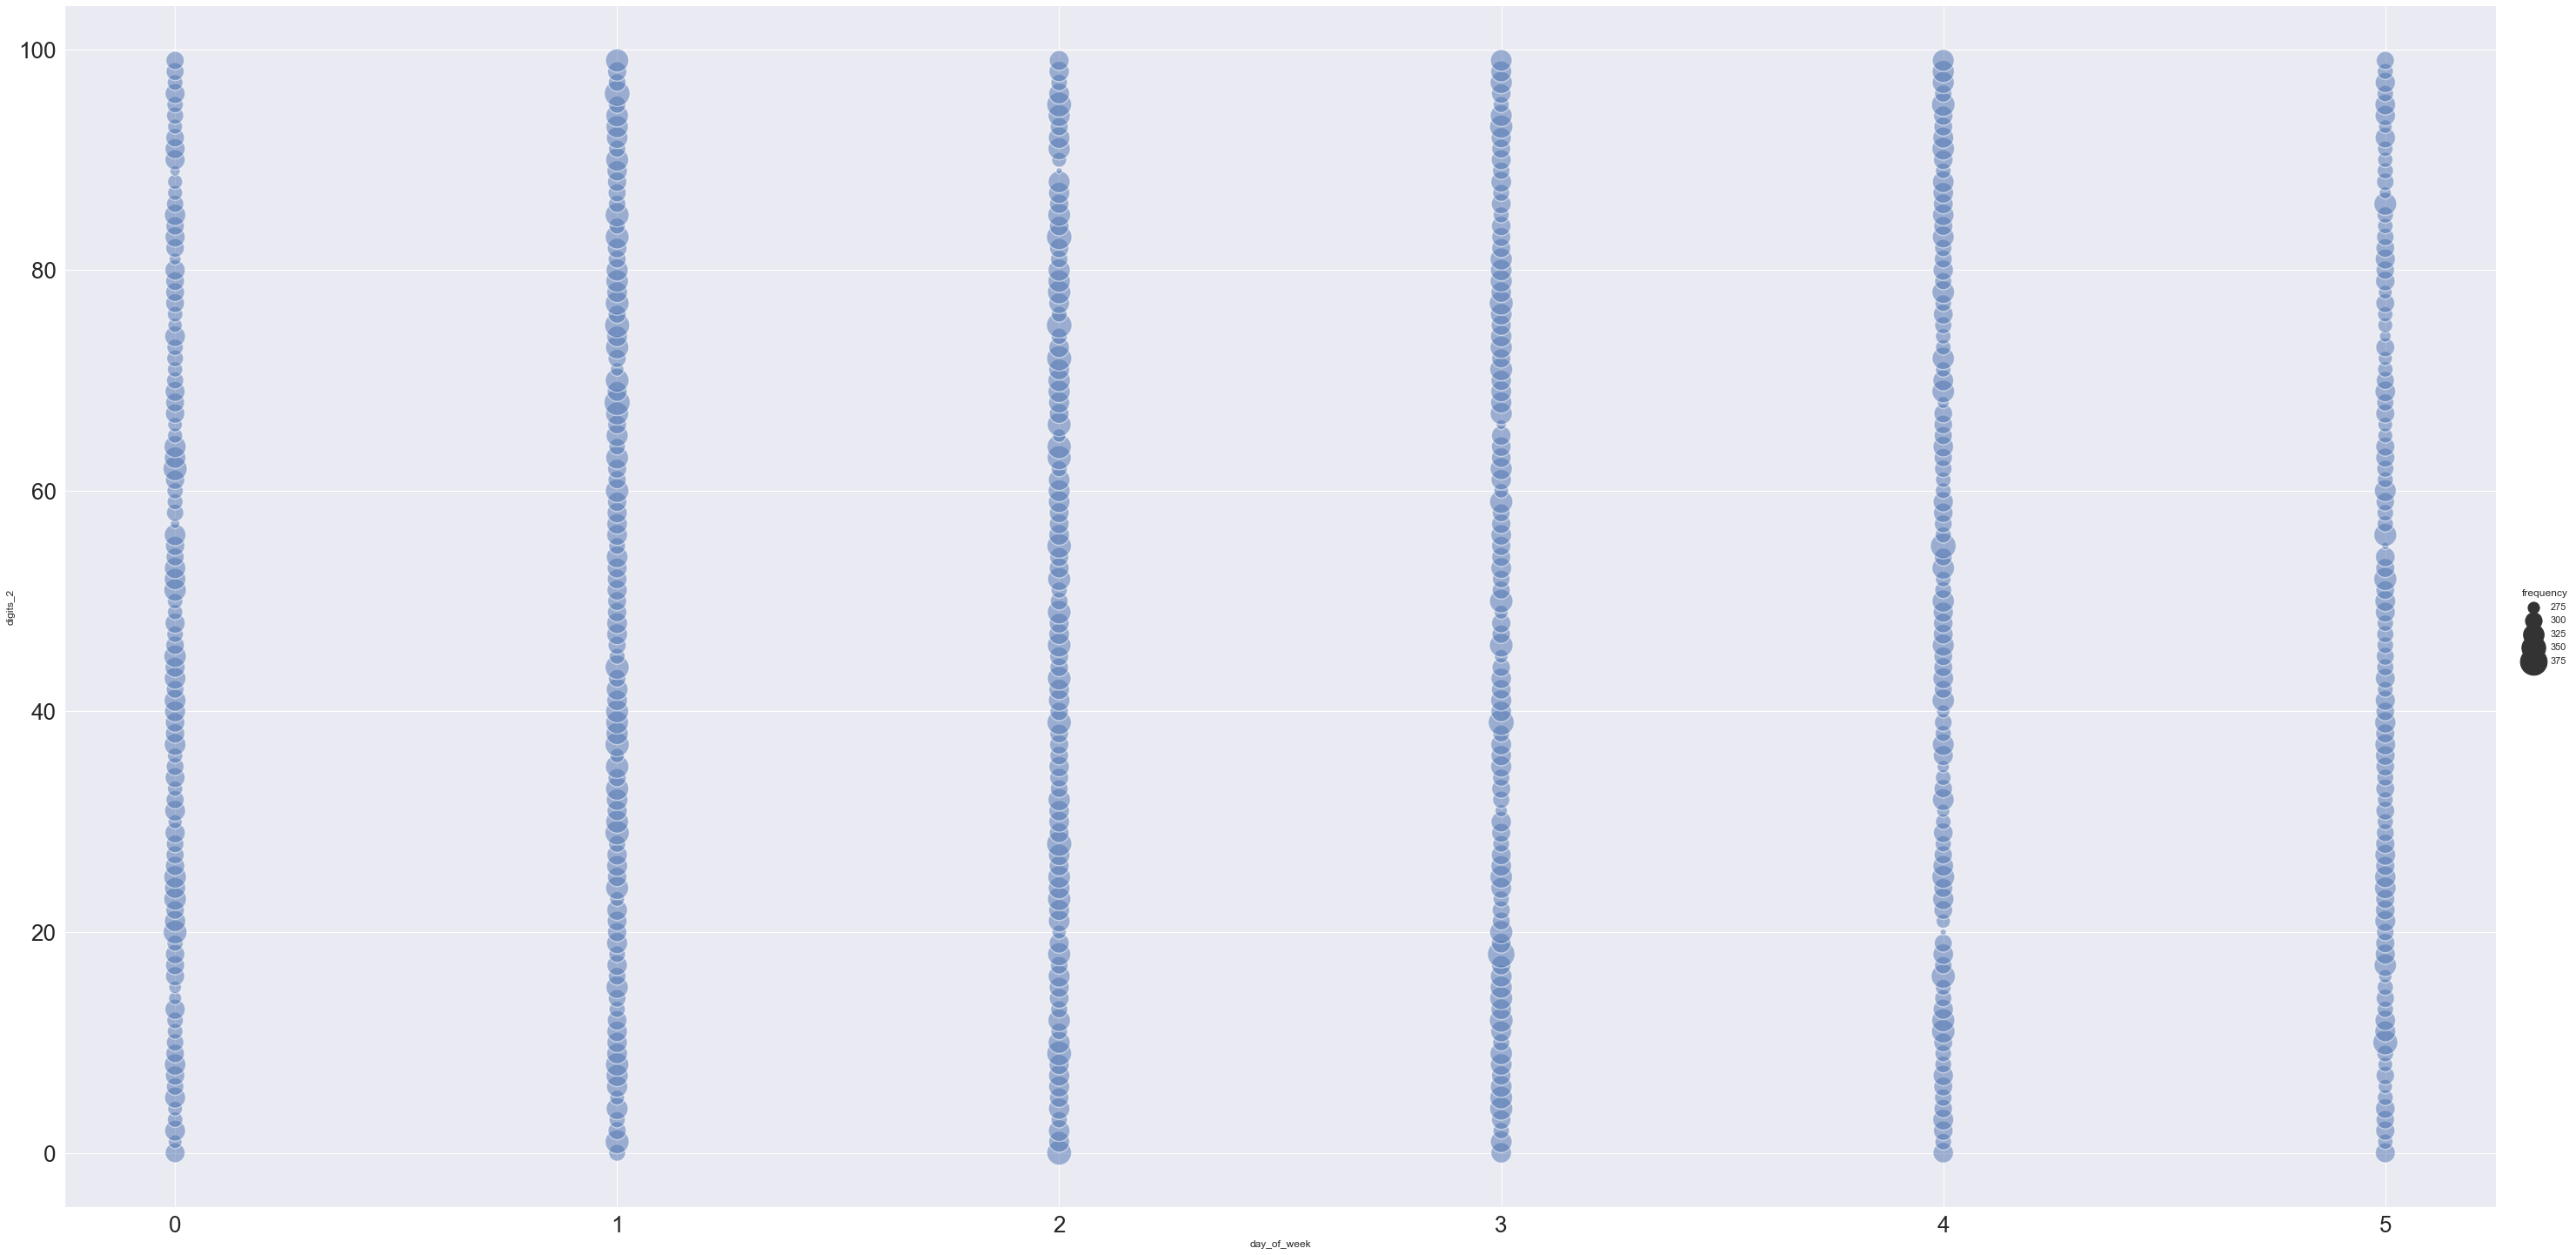

In [371]:
plot_scatter(df_quiniela, 'day_of_week', 'digits_2')

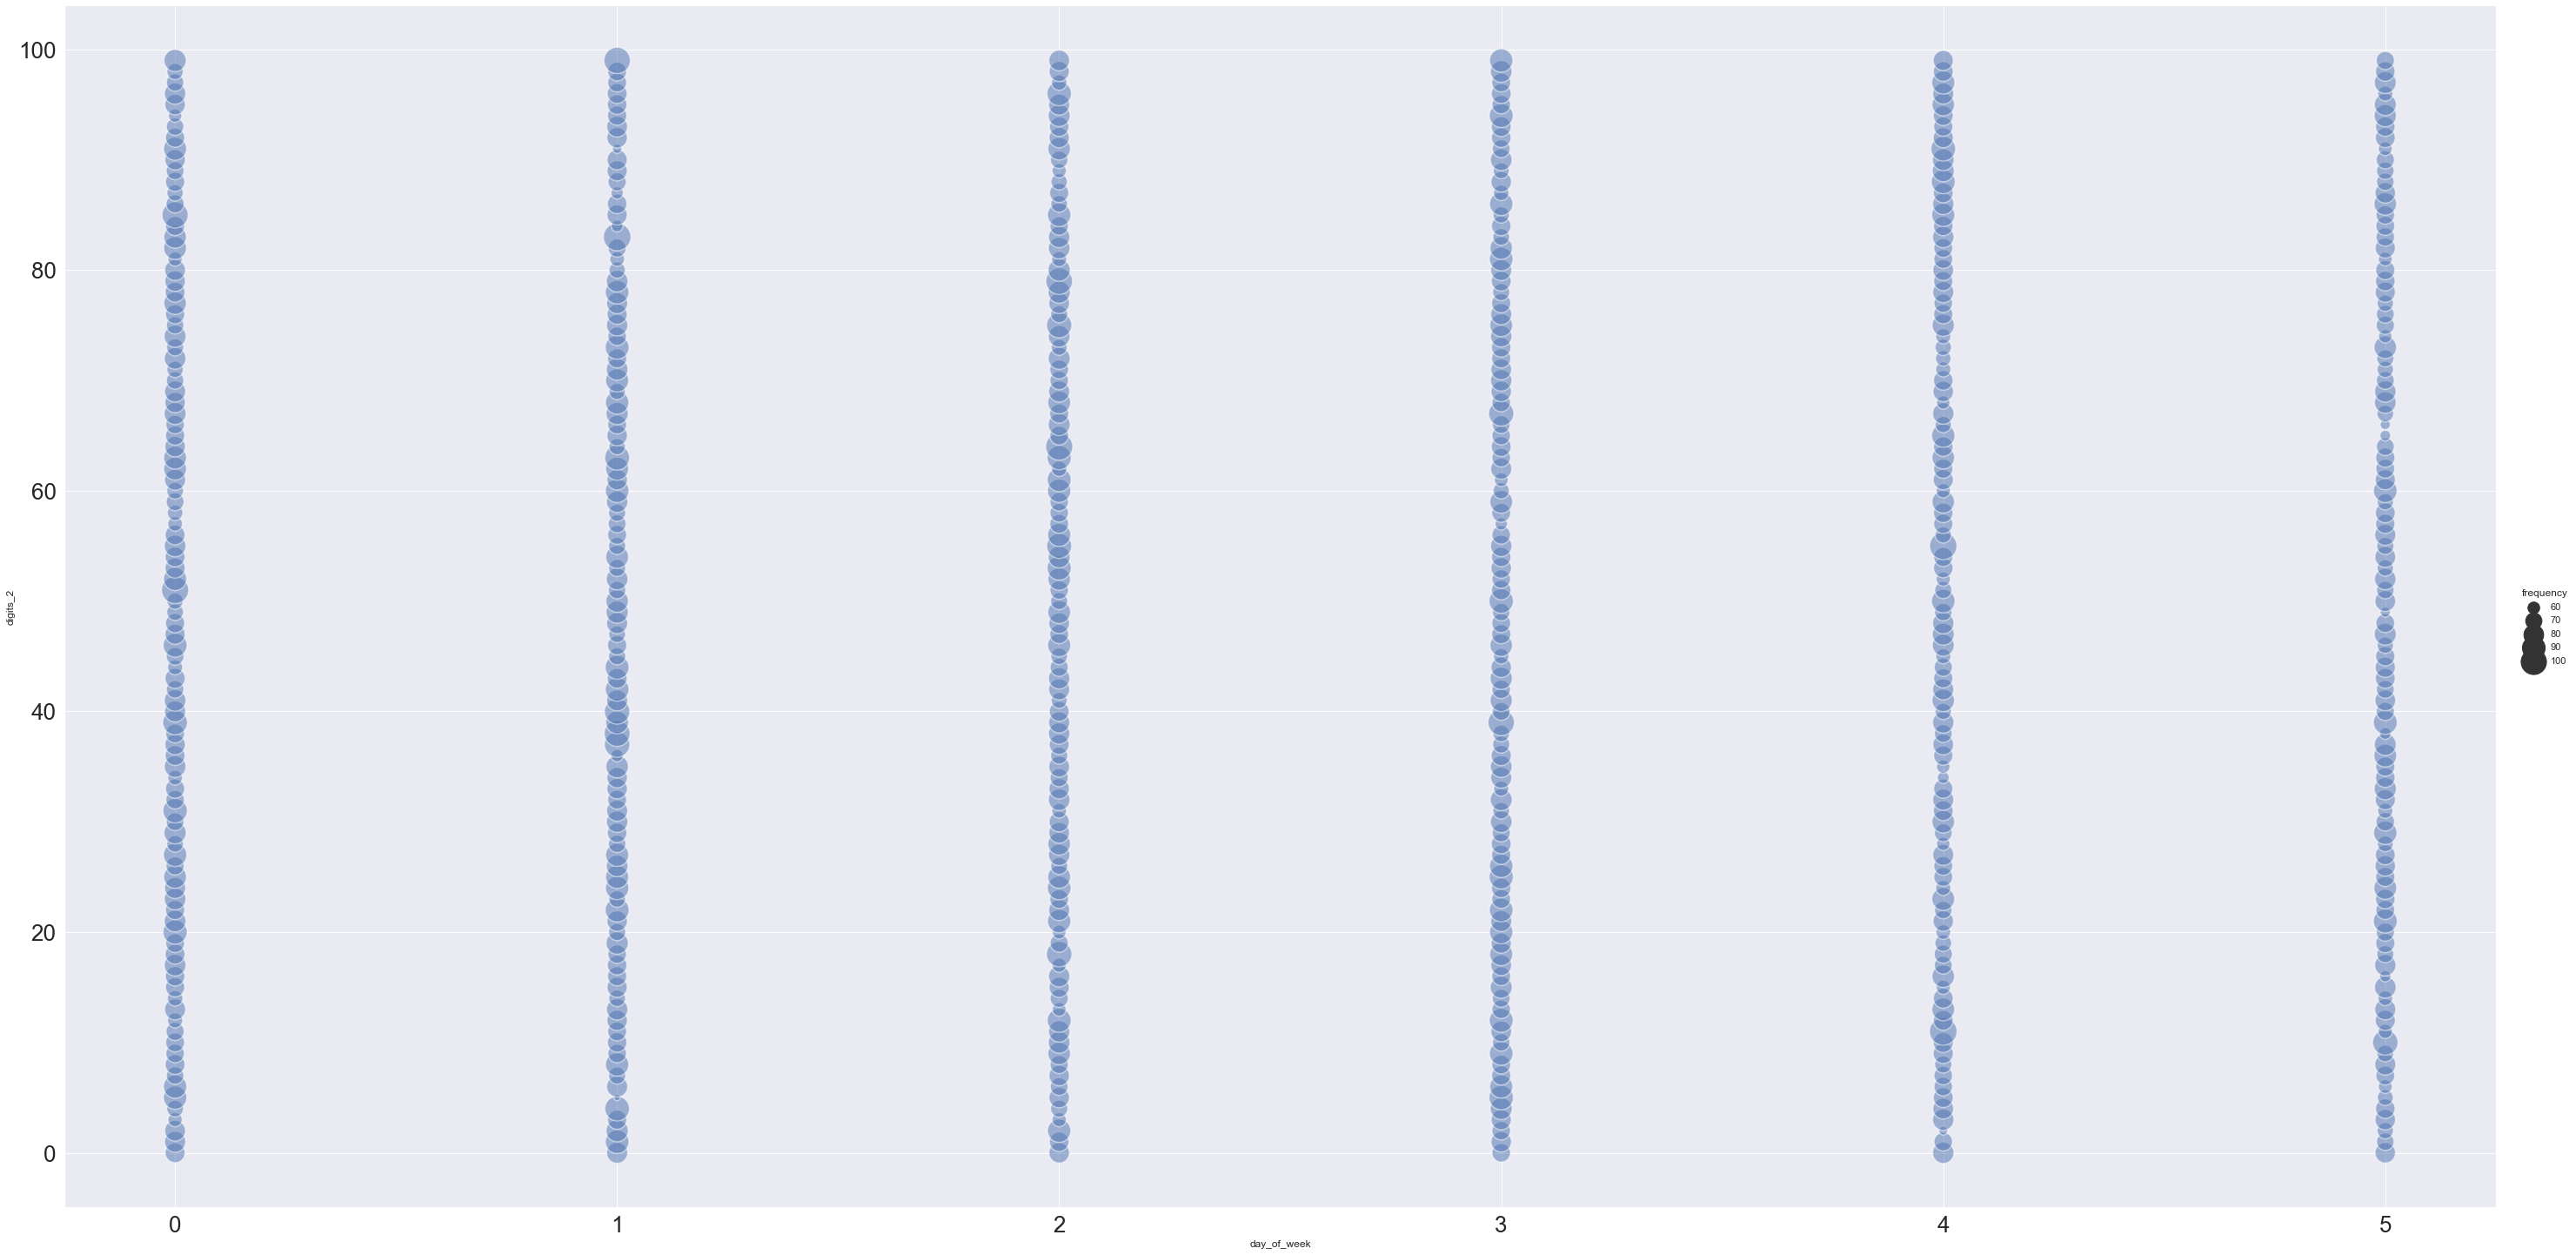

In [376]:
plot_scatter(df_quiniela, 'day_of_week', 'digits_2', 'primera')

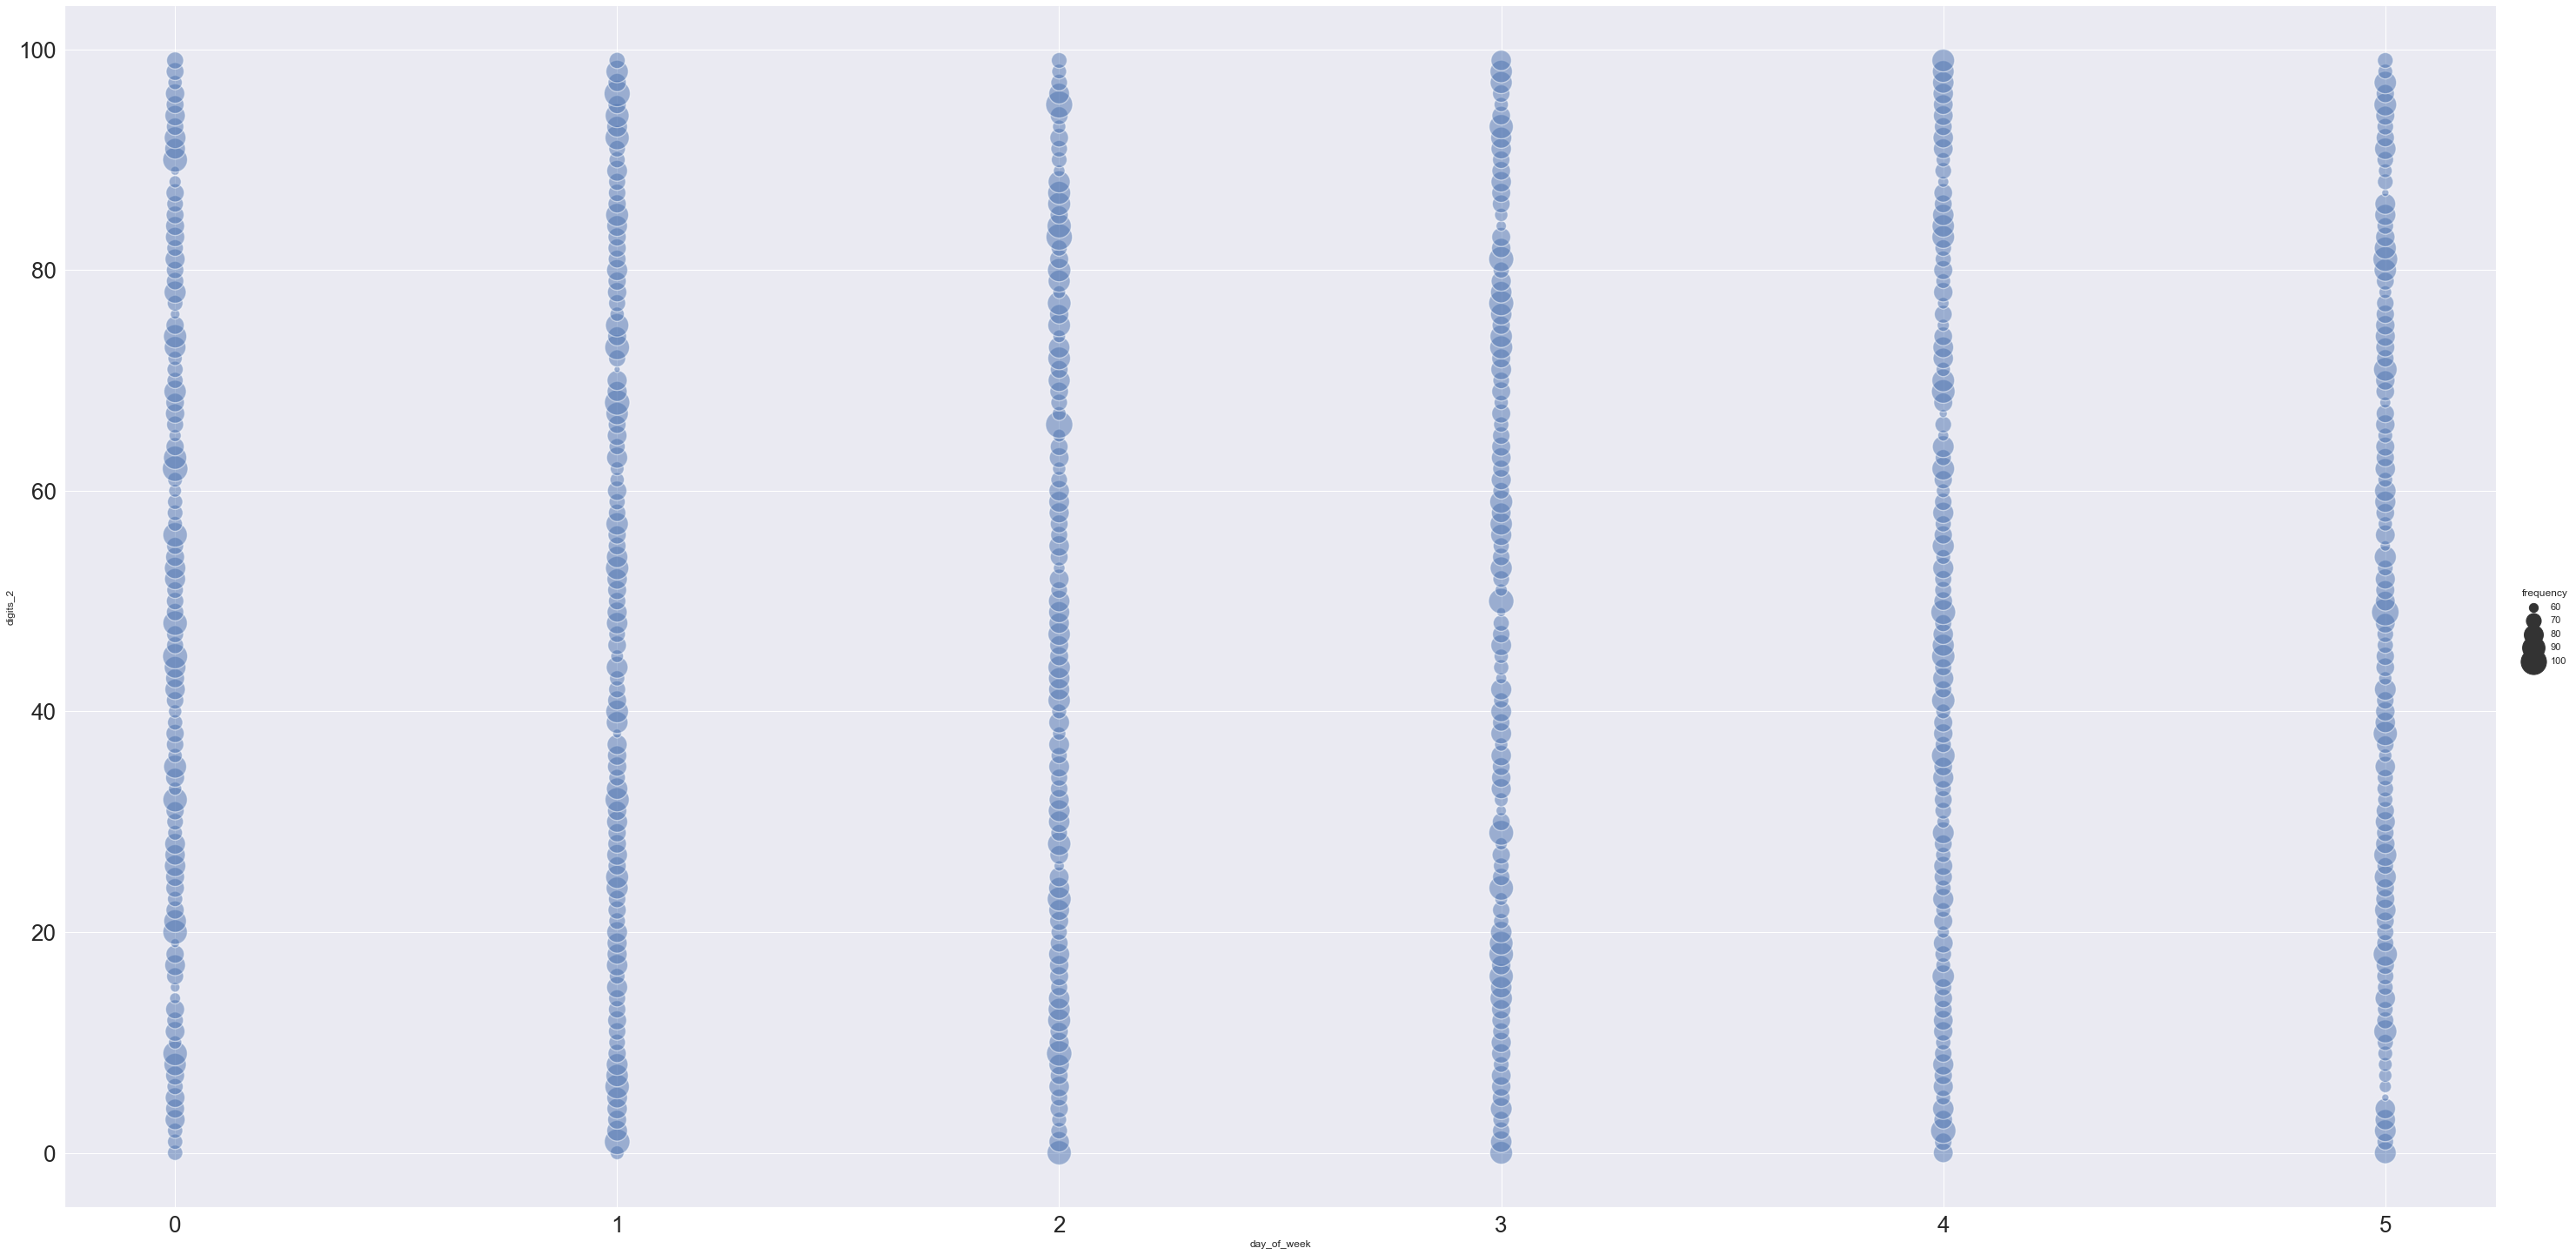

In [377]:
plot_scatter(df_quiniela, 'day_of_week', 'digits_2', 'nocturna')

> *No major tendency or pattern visually identifiable.*

### Add the number of days the 2 digit results have not been drawn for, prior to winning

In [382]:
# 
def calculate_days_without_prize(result_in):

    # Retrieve all lottery dates before the row, for the same result
        # filter dataframe by result and get max from lottery date
    # compare the max lottery date to that of this row
    # calculate days and store

    df_result_temp = df_quiniela[
        (df_quiniela['digits_2'] == result_in) & 
        (df_quiniela['lottery_date'] < df_quiniela[df_quiniela['digits_2'] == result_in]['lottery_date'])
        ]
    

    # last_result_date = df_result_temp['lottery_date'].max()

    # days_without_prize = df_quiniela[df_quiniela['digits_2'] == result_in]['lottery_date'] - last_result_date

    # return days_without_prize
    return df_result_temp

In [395]:
x = df_quiniela[
        (df_quiniela['digits_2'] == 58)]
x.head(20)

lottery_date  quiniela   period  position result  digits_4  digits_3  \
6      2014-11-01  nacional  primera         7   4258      4258       258   
11     2014-11-01  nacional  primera        12   7158      7158       158   
277    2014-11-17  nacional  primera        18   0858       858       858   
455    2014-11-27  nacional  primera        16   9158      9158       158   
545    2014-12-03  nacional  primera         6   7458      7458       458   
554    2014-12-03  nacional  primera        15   7458      7458       458   
572    2014-12-04  nacional  primera        13   6658      6658       658   
578    2014-12-04  nacional  primera        19   2758      2758       758   
770    2014-12-17  nacional  primera        11   6658      6658       658   
901    2014-12-26  nacional  primera         2   8858      8858       858   
1207   2015-01-16  nacional  primera         8   0158       158       158   
1245   2015-01-19  nacional  primera         6   3558      3558       558   
1356   2015-01-24  nacional  primera        17   6658      6658       658   
1515   2015-02-03  nacional  primera        16   0158       158       158   
1595   2015-02-07  nacional  primera        16   2958      2958       958   
1655   2015-02-11  nacional  primera        16   9458      9458       458   
1817   2015-02-20  nacional  primera        18   2358      2358       358   
1823   2015-02-21  nacional  primera         4   3258      3258       258   
1858   2015-02-23  nacional  primera        19   8758      8758       758   
1898   2015-02-25  nacional  primera        19   4358      4358       358   

      digits_2  first_digit  second_digit  third_digit  fourth_digit  \
6           58            4             2            5             8   
11          58            7             1            5             8   
277         58            0             8            5             8   
455         58            9             1            5             8   
545         58            7             4            5             8   
554         58            7             4            5             8   
572         58            6             6            5             8   
578         58            2             7            5             8   
770         58            6             6            5             8   
901         58            8             8            5             8   
1207        58            0             1            5             8   
1245        58            3             5            5             8   
1356        58            6             6            5             8   
1515        58            0             1            5             8   
1595        58            2             9            5             8   
1655        58            9             4            5             8   
1817        58            2             3            5             8   
1823        58            3             2            5             8   
1858        58            8             7            5             8   
1898        58            4             3            5             8   

     position_group  calendar_day  day_of_week  month  
6          a_los_10             1            5     11  
11         a_los_15             1            5     11  
277        a_los_20            17            0     11  
455        a_los_20            27            3     11  
545        a_los_10             3            2     12  
554        a_los_15             3            2     12  
572        a_los_15             4            3     12  
578        a_los_20             4            3     12  
770        a_los_15            17            2     12  
901         a_los_5            26            4     12  
1207       a_los_10            16            4      1  
1245       a_los_10            19            0      1  
1356       a_los_20            24            5      1  
1515       a_los_20             3            1      2  
1595       a_los_20             7 

In [ ]:
df_quiniela['days_without_prize'] = df_quiniela['digits_2'].apply(lambda x: calculate_days_without_prize(x))

df_quiniela

### Transform categorical features

### Check relationship between variables

<AxesSubplot:>

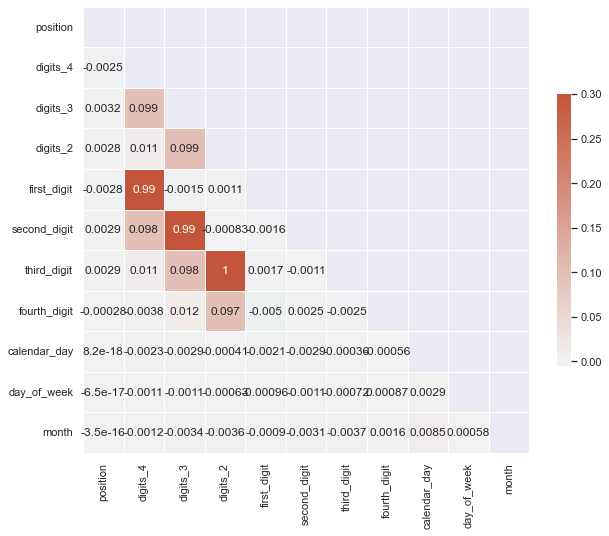

In [146]:
# Create the correlation matrix
corr = df_quiniela.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the figure
fig, ax = plt.subplots(figsize=(10,10))
# Generate a custom diverging colormap
color_map = sns.diverging_palette(230, 20, as_cmap=True)
# Create the correlation matrix visual to be displayed
sns.heatmap(
    corr,
    mask=mask,
    cmap=color_map,
    vmax=.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': .5},
    annot=True
)

> It was expected that digits would be highly correlated between each other, considering them individually and also grouped. However, there are some, like the last 2 digits and the 4 digits, that are not highly correlated.